In [ ]:
# !git clone https://github.com/Vicomtech/DMD-Driver-Monitoring-Dataset.git

In [ ]:
# import torch

# torch.cuda.empty_cache()

In [ ]:
!pip install --upgrade opencv-python==4.2.0
!pip install --upgrade vcd==6.0
!pip install ffmpeg
!pip install ffmpeg-python

ERROR: Ignored the following yanked versions: 3.4.11.39, 3.4.17.61, 4.4.0.42, 4.4.0.44, 4.5.4.58, 4.5.5.62, 4.7.0.68
ERROR: Could not find a version that satisfies the requirement opencv-python==4.2.0 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.60, 4.5.5.64, 4.6.0.66, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84, 4.11.0.86)
ERROR: No matching distribution found for opencv-python==4.2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=b71c412f7b4ac562a17f9a22265a888e7b203b890a342d6b47dc78ba67ccbc21
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting toolkit folder as working directory

%cd /content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road
! ls

/content/drive/.shortcut-targets-by-id/1J94HdD7kQ1V6WjLrQ8OrpjEXMBpOBC1d/DMD/Videos_BodyCam/gaze_on_road
looking_road  not_looking_road


In [ ]:
import os
import random
from sklearn.model_selection import train_test_split
from collections import Counter

# Paths to datasets
dataset_paths = {
    "actions": '/content/drive/My Drive/DMD/Videos_BodyCam/driver_actions',
    "gaze": '/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road',
    "hands_using_wheel": '/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel',
}

# Initialize a dictionary to hold train and test splits for each dataset
dataset_splits = {}

# Process each dataset
for dataset_type, base_path in dataset_paths.items():
    data = []  # Hold (file_path, label) pairs
    labels = []  # Hold labels only for stratified splitting

    # Traverse folders and assign labels
    for label in os.listdir(base_path):
        folder_path = os.path.join(base_path, label)
        if os.path.isdir(folder_path):
            for video_file in os.listdir(folder_path):
                if video_file.endswith('.mp4'):  # Adjust if videos have a different format
                    file_path = os.path.join(folder_path, video_file)
                    data.append((file_path, label))
                    labels.append(label)

    # Ensure consistent shuffling
    random.seed(42)
    random.shuffle(data)

    # Extract file paths and labels separately
    file_paths = [item[0] for item in data]
    labels = [item[1] for item in data]

    # Stratified train-test split (80% train, 20% test)
    train_files, test_files, train_labels, test_labels = train_test_split(
        file_paths, labels, test_size=0.2, stratify=labels, random_state=42
    )

    # Save splits in the dataset_splits dictionary
    dataset_splits[dataset_type] = {
        "train": list(zip(train_files, train_labels)),
        "test": list(zip(test_files, test_labels)),
    }

    # Print dataset statistics
    print(f"{dataset_type.capitalize()} Dataset:")
    print(f"  Total: {len(data)} videos")
    print(f"  Training: {len(train_files)} videos ({Counter(train_labels)})")
    print(f"  Testing: {len(test_files)} videos ({Counter(test_labels)})\n")

# Optional: View a few samples from a dataset
print("Sample from Actions Train Set:", dataset_splits["actions"]["train"][:5])
print("Sample from Actions Test Set:", dataset_splits["actions"]["test"][:5])


Actions Dataset:
  Total: 10392 videos
  Training: 8313 videos (Counter({'safe_drive': 3164, 'phonecall_left': 1235, 'phonecall_right': 1149, 'reach_side': 685, 'texting_left': 444, 'texting_right': 442, 'hair_and_makeup': 388, 'radio': 363, 'drinking': 322, 'reach_backseat': 121}))
  Testing: 2079 videos (Counter({'safe_drive': 791, 'phonecall_left': 309, 'phonecall_right': 288, 'reach_side': 171, 'texting_left': 111, 'texting_right': 110, 'hair_and_makeup': 97, 'radio': 91, 'drinking': 81, 'reach_backseat': 30}))

Gaze Dataset:
  Total: 1600 videos
  Training: 1280 videos (Counter({'looking_road': 640, 'not_looking_road': 640}))
  Testing: 320 videos (Counter({'not_looking_road': 160, 'looking_road': 160}))

Hands_using_wheel Dataset:
  Total: 11928 videos
  Training: 9542 videos (Counter({'only_left': 4275, 'both': 3068, 'only_right': 1839, 'none': 360}))
  Testing: 2386 videos (Counter({'only_left': 1069, 'both': 767, 'only_right': 460, 'none': 90}))

Sample from Actions Train Set:

In [ ]:
dataset_splits["gaze"]["train"][:5]

[('/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road/not_looking_road/8_s2_interval_5822_to_5881_clip1.mp4',
  'not_looking_road'),
 ('/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road/looking_road/interval_2046_to_2105_clip1.mp4',
  'looking_road'),
 ('/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road/not_looking_road/interval_5654_to_5713_clip1.mp4',
  'not_looking_road'),
 ('/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road/looking_road/interval_1730_to_1789_clip3.mp4',
  'looking_road'),
 ('/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road/looking_road/interval_987_to_1046_clip5.mp4',
  'looking_road')]

In [ ]:
import cv2

# Path to the video file
video_path = "/content/drive/My Drive/DMD/Videos_BodyCam/gaze_on_road/looking_road/interval_5694_to_5753_clip1.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get the total number of frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Release the video capture object
cap.release()

print(f"Total number of frames in the video: {total_frames}")


Total number of frames in the video: 0


In [ ]:
import torch
from torch.utils.data import Dataset
import cv2
import numpy as np
import warnings


class DriverActionDataset(Dataset):
    def __init__(self, data, transform=None, clip_len=30):
        """
        Args:
            data: List of tuples (video_path, label) for each video.
            transform: Optional transformations to apply to each frame.
            clip_len: Fixed number of frames for each video clip.
        """
        self.data = data
        self.transform = transform
        self.clip_len = clip_len  # Set a fixed length for all clips

        # Create a mapping from label names to numeric indices
        self.label_map = {label: idx for idx, label in enumerate(set([label for _, label in data]))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get the video path and label
        video_path, label = self.data[idx]

        # Initialize video capture
        cap = cv2.VideoCapture(video_path)
        frames = []
        frame_count = 0 #counter to track frame position

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            #Grab every 3rd frame
            if frame_count % 3 == 0:
              # Resize the frame
              frame = cv2.resize(frame, (224, 224))

              # Apply transformations
              if self.transform:
                  frame = self.transform(frame)

              # # Convert to tensor and normalize
              # frame_tensor = torch.from_numpy(frame).permute(2, 0, 1).float() / 255.0
              # frames.append(frame_tensor)
            # Convert to tensor only if not already transformed
              if isinstance(frame, np.ndarray):
                  frame_tensor = torch.from_numpy(frame).permute(2, 0, 1).float() / 255.0
              else:
                  frame_tensor = frame  # Assume transform already converts to tensor

              frames.append(frame_tensor)
            frame_count +=1 # Increment frame counter

        cap.release()

        # Handle empty or corrupted videos
        if len(frames) == 0:
            warnings.warn(f"Empty or unreadable video at {video_path}. Using zero frames.")
            frames = [torch.zeros((3, 224, 224))] * self.clip_len

        # Truncate or pad frames
        if len(frames) > self.clip_len:
            frames = frames[:self.clip_len]
        elif len(frames) < self.clip_len:
            frames.extend([frames[-1]] * (self.clip_len - len(frames)))

        # Stack frames into a single tensor
        video_tensor = torch.stack(frames).permute(1, 0, 2, 3)  # Shape: (Channels, clip_len, Height, Width)

        # Convert label to index
        label_idx = self.label_map[label]

        return video_tensor, label_idx


In [ ]:
# torch.cuda.empty_cache()

('/content/drive/My Drive/DMD/videos/driver_actions/training_data/phonecall_left/interval_13569_to_13628_clip17.mp4',
 'phonecall_left')

In [ ]:
# Define transformations
from torchvision.transforms import Compose, Normalize, ToTensor

# transform = Compose([
#     ToTensor(),
#     Normalize(mean=[0.5], std=[0.5]),  # Normalize to [-1, 1]
# ])
transform = None

# Clip length for videos
clip_len = 20

# Initialize the datasets
actions_train_dataset = DriverActionDataset(
    data=dataset_splits["actions"]["train"],
    transform=transform,
    clip_len=clip_len
)

actions_test_dataset = DriverActionDataset(
    data=dataset_splits["actions"]["test"],
    transform=transform,
    clip_len=clip_len
)

gaze_train_dataset = DriverActionDataset(
    data=dataset_splits["gaze"]["train"],
    transform=transform,
    clip_len=clip_len
)

gaze_test_dataset = DriverActionDataset(
    data=dataset_splits["gaze"]["test"],
    transform=transform,
    clip_len=clip_len
)

hands_train_dataset = DriverActionDataset(
    data=dataset_splits["hands_using_wheel"]["train"],
    transform=transform,
    clip_len=clip_len
)

hands_test_dataset = DriverActionDataset(
    data=dataset_splits["hands_using_wheel"]["test"],
    transform=transform,
    clip_len=clip_len
)

# Get the list of all label names from the actions train dataset
actions_label_names = list(actions_train_dataset.label_map.keys())
gaze_label_names = list(gaze_train_dataset.label_map.keys())
hands_label_names = list(hands_train_dataset.label_map.keys())

# Output label names
print("All actions label names:", actions_label_names)
print("All gaze label names:", gaze_label_names)
print("All hands label names:", hands_label_names)
print("============================================================================")
# Number of samples in each dataset
print("Number of samples in Actions Training Dataset:", len(actions_train_dataset))
print("Number of samples in Actions Testing Dataset:", len(actions_test_dataset))
print("============================================================================")
print("Number of samples in Gaze Training Dataset:", len(gaze_train_dataset))
print("Number of samples in Gaze Testing Dataset:", len(gaze_test_dataset))
print("============================================================================")
print("Number of samples in Hand on wheel Training Dataset:", len(hands_train_dataset))
print("Number of samples in Hand on wheel Testing Dataset:", len(hands_test_dataset))



All actions label names: ['texting_right', 'reach_backseat', 'phonecall_right', 'safe_drive', 'reach_side', 'radio', 'drinking', 'hair_and_makeup', 'phonecall_left', 'texting_left']
All gaze label names: ['not_looking_road', 'looking_road']
All hands label names: ['only_left', 'none', 'both', 'only_right']
Number of samples in Actions Training Dataset: 8313
Number of samples in Actions Testing Dataset: 2079
Number of samples in Gaze Training Dataset: 1280
Number of samples in Gaze Testing Dataset: 320
Number of samples in Hand on wheel Training Dataset: 9542
Number of samples in Hand on wheel Testing Dataset: 2386


In [ ]:
# Total number of samples
print(len(hands_test_dataset))

# Access the first sample
# sample = hands_test_dataset[0]
# print(sample)


2386


[('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/both/interval_453_to_512_clip1.mp4', 'both'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/only_left/interval_1006_to_1065_clip8.mp4', 'only_left'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/only_left/8_s2_interval_13044_to_13103_clip3.mp4', 'only_left'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/only_left/interval_3553_to_3612_clip3.mp4', 'only_left'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/only_left/interval_3431_to_3490_clip1.mp4', 'only_left'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/both/8_s2_interval_1418_to_1477_clip4.mp4', 'both'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/none/28_s4_interval_14287_to_14346_clip1.mp4', 'none'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/both/interval_644_to_703_clip10.mp4', 'both'), ('/content/drive/My Drive/DMD/Videos_BodyCam/hands_usi

In [ ]:
# if hasattr(actions_test_dataset, 'labels'):
#     print("Labels exist in the dataset.")
#     labels = actions_test_dataset.labels
#     num_classes = len(set(labels))  # Count unique classes
#     print(f"Number of classes: {num_classes}")
# else:
#     print("Labels attribute not found in the dataset.")


Labels attribute not found in the dataset.


In [ ]:
# # Collect all labels
# all_labels = []
# for i in range(len(actions_test_dataset)):
#     _, label = actions_test_dataset[i]  # Assuming each sample is a tuple (data, label)
#     all_labels.append(label)

# # Count unique classes
# num_classes = len(set(all_labels))
# print(f"Number of classes: {num_classes}")


Number of classes: 4


In [ ]:
actions_label_names

['texting_right',
 'reach_backseat',
 'phonecall_right',
 'safe_drive',
 'reach_side',
 'radio',
 'drinking',
 'hair_and_makeup',
 'phonecall_left',
 'texting_left']

In [ ]:
from collections import Counter

# Assuming labels are the second element in each sample
all_labels = [gaze_test_dataset[i][1] for i in range(len(actions_train_dataset))]
label_counts = Counter(all_labels)
num_classes = len(label_counts)

print(f"Number of classes: {num_classes}")
print(f"Class distribution: {label_counts}")

# #['only_right', 'both', 'none', 'only_left'] === Testing: 2386 videos (Counter({'only_left': 1069, 'both': 767, 'only_right': 460, 'none': 90}))
# Total: 10392 videos
#   Training: 8313 videos (Counter({'safe_drive': 3164, 'phonecall_left': 1235, 'phonecall_right': 1149, 'reach_side': 685, 'texting_left': 444, 'texting_right': 442, 'hair_and_makeup': 388, 'radio': 363, 'drinking': 322, 'reach_backseat': 121}))
#   Testing: 2079 videos (Counter({'safe_drive': 791, 'phonecall_left': 309, 'phonecall_right': 288, 'reach_side': 171, 'texting_left': 111, 'texting_right': 110, 'hair_and_makeup': 97, 'radio': 91, 'drinking': 81, 'reach_backseat': 30}))
# ['safe_drive', 'drinking', 'phonecall_left', 'radio', 'texting_right', 'hair_and_makeup', 'phonecall_right', 'reach_backseat', 'texting_left', 'reach_side']

IndexError: list index out of range

In [ ]:
gaze_label_names

['not_looking_road', 'looking_road']

In [ ]:
for index, label in enumerate(all_labels):
    if label == 2:  # Check if the label is equal to 2
        print(index)


6
23
45
67
72
102
106
111
131
157
252
301
311
331
347
348
371
379
400
437
524
525
532
536
541
558
608
627
677
692
704
708
740
743
763
875
896
971
1023
1085
1101
1129
1137
1214
1241
1267
1280
1307
1357
1364
1386
1418
1427
1430
1501
1559
1601
1617
1640
1646
1658
1664
1707
1714
1733
1758
1775
1835
1848
1863
1883
1915
2001
2014
2033
2055
2100
2111
2163
2184
2241
2254
2272
2286
2303
2306
2311
2361
2372
2385


In [ ]:
# Check if `data` exists

if hasattr(hands_test_dataset, 'data'):
    print(hands_test_dataset.data[6])


all_labels[6]

('/content/drive/My Drive/DMD/Videos_BodyCam/hands_using_wheel/none/28_s4_interval_14287_to_14346_clip1.mp4', 'none')


NameError: name 'all_labels' is not defined

In [ ]:
# Fetch the first sample from the dataset
train_dataset = gaze_train_dataset
video_tensor, label_idx = train_dataset[499]

print("Video Tensor Shape:", video_tensor.shape)  # Expected: (Channels, clip_len, Height, Width)
print("Label Index:", label_idx)


label_name = [name for name, idx in train_dataset.label_map.items() if idx == label_idx][0]
print("Label Name:", label_name)


Video Tensor Shape: torch.Size([3, 20, 224, 224])
Label Index: 1
Label Name: looking_road


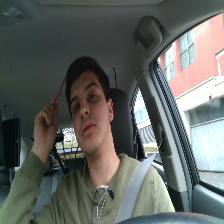

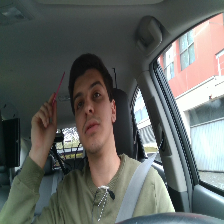

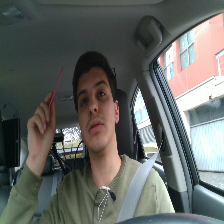

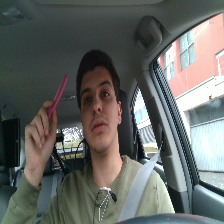

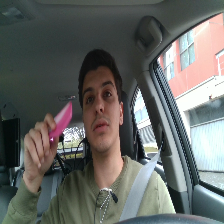

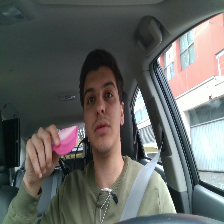

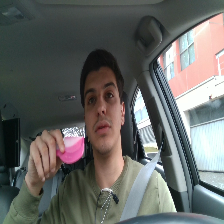

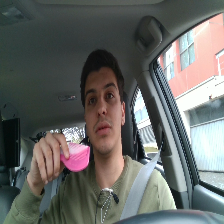

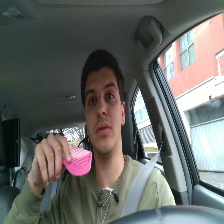

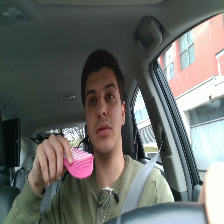

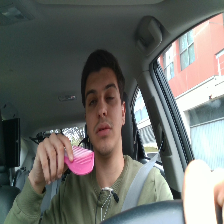

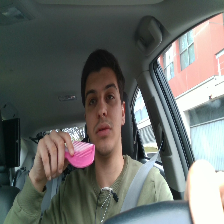

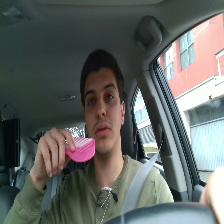

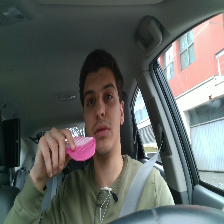

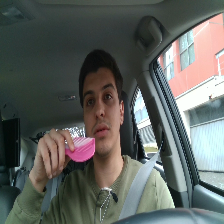

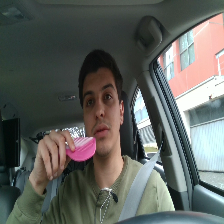

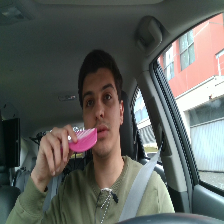

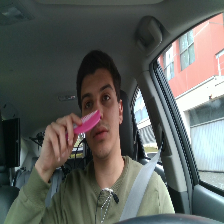

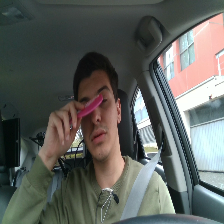

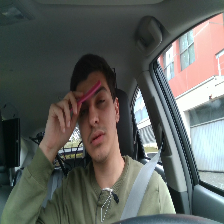

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

# Convert video tensor to NumPy for easier display
video_np = video_tensor.permute(1, 2, 3, 0).numpy()  # Convert to (Num Frames, Height, Width, Channels)
# video_np = video_tensor.permute(0, 2, 3, 1).numpy()

# Display each frame
for i, frame in enumerate(video_np):
    frame = (frame * 255).astype(np.uint8)  # Convert back to uint8 if needed (normalize to 0-255 if originally scaled)
    # stacked_frames = np.vstack(frame)  # Stack frames vertically for display
    cv2_imshow(frame)


In [ ]:
num_frames = video_np.shape[0]  # The first dimension of video_np corresponds to frames
print(f"Total number of frames: {num_frames}")

Total number of frames: 20


In [ ]:
!pip install pytorchvideo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 45.1 MB/s eta 0:00:00
  Created wheel for pytorchvideo: filename=pytorchvideo-0.1.5-py3-none-any.whl size=188685 sha256=cf74aaf2239a480b8deff954ccd033139768f295ae74eb6dec33dd6e0950596b
  Stored in directory: /root/.cache/pip/wheels/ff/4e/81/0f72a543be9ed7eb737c95bfc5da4025e73226b44368074ece
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61396 sha256=28113293089f6416fddbf0ed0afaf15748ad6d2855adddf138151dcbc484eab6
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel 

In [ ]:
!pip install torchsummary

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models.video as models
import torch
from pytorchvideo.models import resnet
from transformers import get_linear_schedule_with_warmup

In [ ]:
# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Assuming `dataset` is your initialized dataset object

actions_num_classes = len(actions_train_dataset.label_map)  # Define the number of classes based on the dataset
gaze_num_classes = len(gaze_train_dataset.label_map)  # Define the number of classes based on the dataset
hands_num_classes = len(hands_train_dataset.label_map)  # Define the number of classes based on the dataset
actions_num_classes,gaze_num_classes,hands_num_classes

(10, 2, 4)

In [ ]:
from torch.utils.data import DataLoader

# Define batch size and number of epochs
batch_size = 8
num_epochs = 10

# Create DataLoader for training
actions_train_dataloader = DataLoader(actions_train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
actions_test_dataloader = DataLoader(actions_test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

gaze_train_dataloader = DataLoader(gaze_train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
gaze_test_dataloader = DataLoader(gaze_test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

hands_train_dataloader = DataLoader(hands_train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
hands_test_dataloader = DataLoader(hands_test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

actions_train_dataloader, actions_test_dataloader,gaze_train_dataloader, gaze_test_dataloader,hands_train_dataloader, hands_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b15866f1d20>,
 <torch.utils.data.dataloader.DataLoader at 0x7b15866f2680>)

In [ ]:
print(len(actions_train_dataloader), len(actions_test_dataloader))
print(len(gaze_train_dataloader), len(gaze_test_dataloader))
print(len(hands_train_dataloader), len(hands_test_dataloader))

1040 260
886 222
1193 299


In [ ]:
hands_test_dataloader

In [ ]:
img, label = next(iter(gaze_test_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, frame, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([8, 3, 20, 224, 224]) -> [batch_size, color_channels, frame, height, width]
Label shape: torch.Size([8])


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# import numpy as np
# import torch
# from torch.utils.data import DataLoader
# from torch.nn import Module
# from tqdm.auto import tqdm


# def calculate_metrics(predictions, labels, probabilities, num_classes):
#     """
#     Calculate classification metrics, including per-class and overall ROC AUC, and confusion matrix.

#     Args:
#         predictions (array): Predicted class indices.
#         labels (array): True class labels.
#         probabilities (array): Predicted probabilities for each class.
#         num_classes (int): Number of classes in the classification task.

#     Returns:
#         metrics (dict): Dictionary containing accuracy, precision, recall, F1-score,
#                         per-class ROC AUC, overall ROC AUC, and confusion matrix.
#     """
#     # Accuracy, precision, recall, F1 score
#     accuracy = accuracy_score(labels, predictions) * 100
#     precision = precision_score(labels, predictions, average='macro', zero_division=0)
#     recall = recall_score(labels, predictions, average='macro', zero_division=0)
#     f1 = f1_score(labels, predictions, average='macro')

#     # Overall ROC AUC (multi-class OvR)
#     try:
#         overall_roc_auc = roc_auc_score(labels, probabilities, multi_class='ovr', average='macro')
#         # roc_auc = roc_auc_score(labels, probabilities, average="macro", multi_class="ovr")

#     except ValueError:
#         overall_roc_auc = float('nan')  # Handle cases where ROC AUC cannot be computed

#     # Per-class ROC AUC
#     per_class_roc_auc = {}
#     for class_idx in range(num_classes):
#         try:
#             per_class_roc_auc[class_idx] = roc_auc_score(
#                 (labels == class_idx).astype(int), probabilities[:, class_idx]
#             )
#         except ValueError:
#             per_class_roc_auc[class_idx] = float('nan')  # Handle cases where a class is missing

#     # Confusion Matrix
#     conf_matrix = confusion_matrix(labels, predictions)

#     return {
#         'accuracy': accuracy,
#         'precision': precision,
#         'recall': recall,
#         'f1': f1,
#         'overall_roc_auc': overall_roc_auc,
#         'per_class_roc_auc': per_class_roc_auc,
#         'confusion_matrix': conf_matrix
#     }


# def train_step(model: Module, dataloader: DataLoader, loss_fn: Module, optimizer, scheduler, device, num_classes):
#     """
#     Performs one training step and calculates metrics.

#     Args:
#         model (Module): The PyTorch model.
#         dataloader (DataLoader): DataLoader for the training dataset.
#         loss_fn (Module): Loss function.
#         optimizer: Optimizer for the model.
#         scheduler: Learning rate scheduler.
#         device: The device (CPU or GPU).
#         num_classes (int): Number of classes in the classification task.

#     Returns:
#         tuple: Mean loss and metrics dictionary.
#     """
#     model.train()
#     losses = []
#     all_predictions = []
#     all_labels = []
#     all_probabilities = []

#     for inputs, labels in dataloader:
#         inputs, labels = inputs.to(device), labels.to(device)

#         # Forward pass
#         optimizer.zero_grad()
#         outputs = model(inputs)  # Outputs are logits
#         loss = loss_fn(outputs, labels)
#         losses.append(loss.item())

#         # Backward pass and optimization
#         loss.backward()
#         optimizer.step()
#         if scheduler:
#             scheduler.step()

#         # Collect predictions, probabilities, and labels
#         probabilities = torch.softmax(outputs, dim=1).detach().cpu().numpy()
#         predicted = np.argmax(probabilities, axis=1)

#         all_predictions.extend(predicted)
#         all_labels.extend(labels.cpu().numpy())
#         all_probabilities.extend(probabilities)

#     metrics = calculate_metrics(
#         predictions=np.array(all_predictions),
#         labels=np.array(all_labels),
#         probabilities=np.array(all_probabilities),
#         num_classes=num_classes
#     )
#     return np.mean(losses), metrics


# def test_step(model: Module, dataloader: DataLoader, loss_fn: Module, device, num_classes):
#     """
#     Performs one evaluation step and calculates metrics.

#     Args:
#         model (Module): The PyTorch model.
#         dataloader (DataLoader): DataLoader for the validation or test dataset.
#         loss_fn (Module): Loss function.
#         device: The device (CPU or GPU).
#         num_classes (int): Number of classes in the classification task.

#     Returns:
#         tuple: Mean loss and metrics dictionary.
#     """
#     model.eval()
#     losses = []
#     all_predictions = []
#     all_labels = []
#     all_probabilities = []

#     with torch.no_grad():
#         for inputs, labels in dataloader:
#             inputs, labels = inputs.to(device), labels.to(device)

#             # Forward pass
#             outputs = model(inputs)  # Outputs are logits
#             loss = loss_fn(outputs, labels)
#             losses.append(loss.item())

#             # Collect predictions, probabilities, and labels
#             probabilities = torch.softmax(outputs, dim=1).detach().cpu().numpy()
#             predicted = np.argmax(probabilities, axis=1)

#             all_predictions.extend(predicted)
#             all_labels.extend(labels.cpu().numpy())
#             all_probabilities.extend(probabilities)

#     metrics = calculate_metrics(
#         predictions=np.array(all_predictions),
#         labels=np.array(all_labels),
#         probabilities=np.array(all_probabilities),
#         num_classes=num_classes
#     )
#     return np.mean(losses), metrics


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.nn import Module
from tqdm.auto import tqdm


def calculate_metrics(predictions, labels, probabilities, num_classes):
    """
    Calculate classification metrics, including per-class and overall ROC AUC, and confusion matrix.

    Args:
        predictions (array): Predicted class indices.
        labels (array): True class labels.
        probabilities (array): Predicted probabilities for each class.
        num_classes (int): Number of classes in the classification task.

    Returns:
        metrics (dict): Dictionary containing accuracy, precision, recall, F1-score,
                        per-class ROC AUC, overall ROC AUC, and confusion matrix.
    """
    # Accuracy, precision, recall, F1 score
    accuracy = accuracy_score(labels, predictions) * 100
    precision = precision_score(labels, predictions, average='macro', zero_division=0)
    recall = recall_score(labels, predictions, average='macro', zero_division=0)
    f1 = f1_score(labels, predictions, average='macro')

    # Overall ROC AUC (multi-class OvR)
    try:
        overall_roc_auc = roc_auc_score(labels, probabilities[:,1]) if num_classes == 2 else roc_auc_score(labels, probabilities, multi_class='ovr', average='macro')
    except ValueError:
        overall_roc_auc = float('nan')  # Handle cases where ROC AUC cannot be computed

    # Per-class ROC AUC
    per_class_roc_auc = {}
    for class_idx in range(num_classes):
        try:
            per_class_roc_auc[class_idx] = roc_auc_score(
                (labels == class_idx).astype(int), probabilities[:, class_idx]
            )
        except ValueError:
            per_class_roc_auc[class_idx] = float('nan')  # Handle cases where a class is missing

    # Confusion Matrix
    conf_matrix = confusion_matrix(labels, predictions)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'overall_roc_auc': overall_roc_auc,
        'per_class_roc_auc': per_class_roc_auc,
        'confusion_matrix': conf_matrix
    }


def train_step(model: Module, dataloader: DataLoader, loss_fn: Module, optimizer, scheduler, device, num_classes):
    """
    Performs one training step and calculates metrics.

    Args:
        model (Module): The PyTorch model.
        dataloader (DataLoader): DataLoader for the training dataset.
        loss_fn (Module): Loss function.
        optimizer: Optimizer for the model.
        scheduler: Learning rate scheduler.
        device: The device (CPU or GPU).
        num_classes (int): Number of classes in the classification task.

    Returns:
        tuple: Mean loss and metrics dictionary.
    """
    model.train()
    losses = []
    all_predictions = []
    all_labels = []
    all_probabilities = []

    for inputs, labels in tqdm(dataloader, desc="Training Step"):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        optimizer.zero_grad()
        outputs = model(inputs)  # Outputs are logits
        loss = loss_fn(outputs, labels)
        losses.append(loss.item())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        if scheduler:
            scheduler.step()

        # Collect predictions, probabilities, and labels
        probabilities = torch.softmax(outputs, dim=1).detach().cpu().numpy()
        predicted = np.argmax(probabilities, axis=1)

        all_predictions.extend(predicted)
        all_labels.extend(labels.cpu().numpy())
        all_probabilities.extend(probabilities)

    # Metrics calculation
    metrics = calculate_metrics(
        predictions=np.array(all_predictions),
        labels=np.array(all_labels),
        probabilities=np.array(all_probabilities),
        num_classes=num_classes
    )

    return np.mean(losses), metrics


def test_step(model: Module, dataloader: DataLoader, loss_fn: Module, device, num_classes):
    """
    Performs one evaluation step and calculates metrics.

    Args:
        model (Module): The PyTorch model.
        dataloader (DataLoader): DataLoader for the validation or test dataset.
        loss_fn (Module): Loss function.
        device: The device (CPU or GPU).
        num_classes (int): Number of classes in the classification task.

    Returns:
        tuple: Mean loss and metrics dictionary.
    """
    model.eval()
    losses = []
    all_predictions = []
    all_labels = []
    all_probabilities = []

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, desc="Testing Step"):
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)  # Outputs are logits
            loss = loss_fn(outputs, labels)
            losses.append(loss.item())

            # Collect predictions, probabilities, and labels
            probabilities = torch.softmax(outputs, dim=1).detach().cpu().numpy()
            predicted = np.argmax(probabilities, axis=1)

            all_predictions.extend(predicted)
            all_labels.extend(labels.cpu().numpy())
            all_probabilities.extend(probabilities)

    # Metrics calculation
    metrics = calculate_metrics(
        predictions=np.array(all_predictions),
        labels=np.array(all_labels),
        probabilities=np.array(all_probabilities),
        num_classes=num_classes
    )

    # Debugging outputs
    print("\nDebugging Information:")
    print("Ground Truth Distribution:", np.unique(all_labels, return_counts=True))
    print("Prediction Distribution:", np.unique(all_predictions, return_counts=True))
    print("Confusion Matrix Totals:", metrics['confusion_matrix'].sum(axis=1))
    print("Total Samples Processed:", metrics['confusion_matrix'].sum())

    return np.mean(losses), metrics


In [ ]:
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.0, mode='min', verbose=False):
        """
        Early stops the training if validation metric does not improve after a given patience.

        Args:
            patience (int): How many epochs to wait for improvement before stopping.
            min_delta (float): Minimum change in the monitored metric to qualify as improvement.
            mode (str): Whether to monitor 'min' or 'max' (e.g., minimize loss or maximize accuracy).
            verbose (bool): Whether to print a message when stopping early.
        """
        self.patience = patience
        self.min_delta = min_delta
        self.mode = mode
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, current_score):
        if self.best_score is None:
            self.best_score = current_score
        else:
            improvement = (current_score - self.best_score) if self.mode == 'max' else (self.best_score - current_score)
            if improvement > self.min_delta:
                self.best_score = current_score
                self.counter = 0
            else:
                self.counter += 1
                if self.verbose:
                    print(f"No improvement. Patience counter: {self.counter}/{self.patience}")
                if self.counter >= self.patience:
                    self.early_stop = True


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(conf_matrix, class_names):
    """
    Plots a confusion matrix using matplotlib and seaborn.

    Args:
        conf_matrix (array): Confusion matrix.
        class_names (list): List of class names.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

def train(model, train_dataloader, val_dataloader, optimizer, loss_fn, scheduler, epochs, device, num_classes, class_names,patience):
    """
    Trains the model and evaluates on validation set at each epoch.

    Args:
        model (Module): The PyTorch model.
        train_dataloader (DataLoader): DataLoader for the training dataset.
        val_dataloader (DataLoader): DataLoader for the validation dataset.
        optimizer: Optimizer for the model.
        loss_fn (Module): Loss function.
        scheduler: Learning rate scheduler.
        epochs (int): Number of epochs to train.
        device: The device (CPU or GPU).
        num_classes (int): Number of classes in the classification task.
        class_names (list): List of class names.

    Returns:
        dict: Training and validation metrics history.
    """
    early_stopping = EarlyStopping(patience=patience, mode='min', verbose=True)
    history = {
        "train_loss": [], "val_loss": [],
        "train_metrics": [], "val_metrics": []
    }

    for epoch in tqdm(range(epochs)):
        # Training step
        train_loss, train_metrics = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            scheduler=scheduler,
            device=device,
            num_classes=num_classes
        )

        # Validation step
        val_loss, val_metrics = test_step(
            model=model,
            dataloader=val_dataloader,
            loss_fn=loss_fn,
            device=device,
            num_classes=num_classes
        )

        # Store metrics in history
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_metrics"].append(train_metrics)
        history["val_metrics"].append(val_metrics)

        # Print metrics for the epoch
        print(f"Epoch: {epoch + 1}/{epochs}")
        print(f"Train Loss: {train_loss:.4f} | Train Accuracy: {train_metrics['accuracy']:.2f}% | Precision: {train_metrics['precision']:.4f} | Recall: {train_metrics['recall']:.4f} | F1 Score: {train_metrics['f1']:.4f} | ROC AUC: {train_metrics['overall_roc_auc']:.4f}")
        print(f"Val Loss: {val_loss:.4f} | Val Accuracy: {val_metrics['accuracy']:.2f}% | Precision: {val_metrics['precision']:.4f} | Recall: {val_metrics['recall']:.4f} | F1 Score: {val_metrics['f1']:.4f} | ROC AUC: {val_metrics['overall_roc_auc']:.4f}")

        # Print per-class ROC AUC for validation
        print("\nValidation ROC AUC Per Class:")
        for class_idx, auc_score in val_metrics['per_class_roc_auc'].items():
            print(f"Class {class_names[class_idx]}: {auc_score:.4f}")

        # Early stopping check
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered. Training halted.")
            break

    # After training, plot confusion matrix for validation
    final_val_metrics = history["val_metrics"][-1]
    conf_matrix = final_val_metrics['confusion_matrix']
    print("\nConfusion Matrix:")
    plot_confusion_matrix(conf_matrix, class_names)

    return model, history


In [ ]:
def build_resnet_model(num_classes, device, dtype):
  # Initialize the model with explicit device and dtype
    resnet_model = resnet.create_resnet(
    input_channel=3,
    model_depth=50,
    model_num_class=num_classes
    ).to(device=device, dtype=dtype)
    return resnet_model

In [ ]:
import torch
import torch.nn as nn
from torchvision.models import mobilenet_v2


def convert_to_3d(layer):
    """
    Recursively converts Conv2d and BatchNorm2d to Conv3d and BatchNorm3d for all layers.
    """
    if isinstance(layer, nn.Conv2d):
        return nn.Conv3d(
            in_channels=layer.in_channels,
            out_channels=layer.out_channels,
            kernel_size=(3, layer.kernel_size[0], layer.kernel_size[1]),
            stride=(1, layer.stride[0], layer.stride[1]),
            padding=(1, layer.padding[0], layer.padding[1]),
            bias=layer.bias is not None,
        )
    elif isinstance(layer, nn.BatchNorm2d):
        return nn.BatchNorm3d(layer.num_features)
    elif isinstance(layer, nn.Sequential) or isinstance(layer, nn.Module):
        # Recursively update sub-modules
        for name, sub_layer in layer.named_children():
            setattr(layer, name, convert_to_3d(sub_layer))
    return layer


def build_moblienet_model(num_classes, device, dtype):
    """
    Builds a 3D version of MobileNet-v2.

    Args:
        num_classes (int): Number of output classes.
        device: Target device (e.g., "cuda" or "cpu").
        dtype: Data type (e.g., torch.float32).

    Returns:
        mobilenet_3d: MobileNet-v2 adapted for 3D inputs.
    """
    mobilenet_3d = mobilenet_v2(weights=None)

    # Replace the first Conv2d layer with Conv3d
    mobilenet_3d.features[0][0] = nn.Conv3d(
        in_channels=3,
        out_channels=32,
        kernel_size=(3, 3, 3),
        stride=(1, 2, 2),
        padding=(1, 1, 1),
        bias=False,
    )

    # Adapt all layers to 3D
    mobilenet_3d = convert_to_3d(mobilenet_3d)

    # Add an AdaptiveAvgPool3d layer after features
    mobilenet_3d.features.add_module("global_avg_pool", nn.AdaptiveAvgPool3d((1, 1, 1)))

    # Update the classifier for the number of output classes
    mobilenet_3d.classifier[1] = nn.Linear(
        in_features=mobilenet_3d.last_channel,
        out_features=num_classes,
    )

    # Move to the specified device and dtype
    return mobilenet_3d.to(device=device, dtype=dtype)

In [ ]:
# actions_num_classes,gaze_num_classes,hands_num_classes
# Ensure the device is correctly set
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dtype = torch.float32

actions_resnet_model = build_resnet_model(actions_num_classes, device, dtype)
gaze_resnet_model = build_resnet_model(gaze_num_classes, device, dtype)
hands_resnet_model = build_resnet_model(hands_num_classes, device, dtype)

actions_moblienet_model = build_moblienet_model(actions_num_classes, device, dtype)
gaze_moblienet_model = build_moblienet_model(gaze_num_classes, device, dtype)
hands_moblienet_model = build_moblienet_model(hands_num_classes, device, dtype)
# actions_resnet_model,gaze_resnet_model,hands_resnet_model

# actions_slowfast_model = build_slowfast_model(actions_num_classes, device, dtype)
# gaze_slowfast_model = build_slowfast_model(gaze_num_classes, device, dtype)
# hands_slowfast_model = build_slowfast_model(hands_num_classes, device, dtype)
# actions_moblienet_model = build_moblienet_model(10, device, dtype)

In [ ]:
# actions_moblienet_model
hands_num_classes

4

In [ ]:
from torchsummary import summary

# Specify an example input shape based on your data
# For a 3D CNN, an example input might be (Channels, Frames, Height, Width)
input_shape = (3, 30, 224, 224)  # Adjust to match your input data shape

# Display the model summary
summary(hands_resnet_model, input_size=input_shape, device="cuda" if torch.cuda.is_available() else "cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1     [-1, 64, 30, 112, 112]          28,224
       BatchNorm3d-2     [-1, 64, 30, 112, 112]             128
              ReLU-3     [-1, 64, 30, 112, 112]               0
         MaxPool3d-4       [-1, 64, 30, 56, 56]               0
   ResNetBasicStem-5       [-1, 64, 30, 56, 56]               0
            Conv3d-6      [-1, 256, 30, 56, 56]          16,384
       BatchNorm3d-7      [-1, 256, 30, 56, 56]             512
            Conv3d-8       [-1, 64, 30, 56, 56]           4,096
       BatchNorm3d-9       [-1, 64, 30, 56, 56]             128
             ReLU-10       [-1, 64, 30, 56, 56]               0
           Conv3d-11       [-1, 64, 30, 56, 56]          36,864
      BatchNorm3d-12       [-1, 64, 30, 56, 56]             128
             ReLU-13       [-1, 64, 30, 56, 56]               0
           Conv3d-14      [-1, 256, 30,

In [ ]:
from torchsummary import summary

# Input shape: (Channels, Frames, Height, Width)
input_shape = (3, 30, 224, 224)

# Print the model summary
summary(actions_moblienet_model, input_size=input_shape, device="cuda" if torch.cuda.is_available() else "cpu")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1     [-1, 32, 30, 112, 112]           2,592
       BatchNorm3d-2     [-1, 32, 30, 112, 112]              64
             ReLU6-3     [-1, 32, 30, 112, 112]               0
            Conv3d-4     [-1, 32, 30, 112, 112]          27,648
       BatchNorm3d-5     [-1, 32, 30, 112, 112]              64
             ReLU6-6     [-1, 32, 30, 112, 112]               0
            Conv3d-7     [-1, 16, 30, 112, 112]           1,536
       BatchNorm3d-8     [-1, 16, 30, 112, 112]              32
  InvertedResidual-9     [-1, 16, 30, 112, 112]               0
           Conv3d-10     [-1, 96, 30, 112, 112]           4,608
      BatchNorm3d-11     [-1, 96, 30, 112, 112]             192
            ReLU6-12     [-1, 96, 30, 112, 112]               0
           Conv3d-13       [-1, 96, 30, 56, 56]         248,832
      BatchNorm3d-14       [-1, 96, 30,

In [ ]:
# Set random seeds

def train_resnet(resnet_model,train_dataloader,test_dataloader,num_classes,label_names):
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)
  np.random.seed(42)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)
  epochs = 10
  total_steps = len(train_dataloader) * epochs
# scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)
  scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=int(0.1 * total_steps), num_training_steps=total_steps)
  patience = 2

# Start the timer
  from timeit import default_timer as timer
  start_time = timer()

# Call the train function with the additional arguments
  resnet_model, history = train(
      model=resnet_model,
      train_dataloader=train_dataloader,
      val_dataloader=test_dataloader,
      optimizer=optimizer,
      loss_fn=criterion,
      scheduler=scheduler,
      epochs=epochs,
      device=device,
      num_classes=num_classes,
      class_names=label_names,
      patience=patience
  )

# Calculate the elapsed time
  end_time = timer()
  elapsed_time = end_time - start_time
  print(f"Elapsed time: {elapsed_time:.2f} seconds")
  return resnet_model, history


In [ ]:
# actions_resnet_model,gaze_resnet_model,hands_resnet_model

# actions_label_names = list(actions_train_dataset.label_map.keys())
# gaze_label_names = list(gaze_train_dataset.label_map.keys())
# hands_label_names = list(hands_train_dataset.label_map.keys())

# actions_num_classes,gaze_num_classes,hands_num_classes

# actions_train_dataloader, actions_test_dataloader,gaze_train_dataloader, gaze_test_dataloader,hands_train_dataloader, hands_test_dataloader
# # resnet_model, history= train_resnet(gaze_resnet_model,gaze_train_dataloader,gaze_test_dataloader,gaze_num_classes,gaze_label_names)
# # resnet_model, history= train_resnet(hands_resnet_model,hands_train_dataloader,hands_test_dataloader,hands_num_classes,hands_label_names)

(<torch.utils.data.dataloader.DataLoader at 0x7da94765baf0>,
 <torch.utils.data.dataloader.DataLoader at 0x7da9476596c0>)

  0%|          | 0/1 [00:00<?, ?it/s]

Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

<ipython-input-7-c0a4ea17c0fc>:65: UserWarning: Empty or unreadable video at /content/drive/My Drive/DMD/Videos_BodyCam/driver_actions/safe_drive/8_s1_interval_3147_to_3206_clip4.mp4. Using zero frames.
  warnings.warn(f"Empty or unreadable video at {video_path}. Using zero frames.")


Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 91,  81, 171, 288,  97, 111, 309,  30, 110, 791]))
Prediction Distribution: (array([0, 1, 2, 3, 5, 9]), array([  28,    4,   86,  425,  394, 1142]))
Confusion Matrix Totals: [ 91  81 171 288  97 111 309  30 110 791]
Total Samples Processed: 2079
Epoch: 1/1
Train Loss: 1.6568 | Train Accuracy: 46.88% | Precision: 0.2724 | Recall: 0.1792 | F1 Score: 0.1594 | ROC AUC: 0.7004
Val Loss: 1.5311 | Val Accuracy: 53.68% | Precision: 0.3275 | Recall: 0.2534 | F1 Score: 0.2404 | ROC AUC: 0.8108

Validation ROC AUC Per Class:
Class radio: 0.9706
Class drinking: 0.8636
Class reach_side: 0.8256
Class phonecall_right: 0.9767
Class hair_and_makeup: 0.9019
Class phonecall_left: 0.5033
Class texting_left: 0.3346
Class reach_backseat: 0.8798
Class texting_right: 0.9215
Class safe_drive: 0.9306

Confusion Matrix:


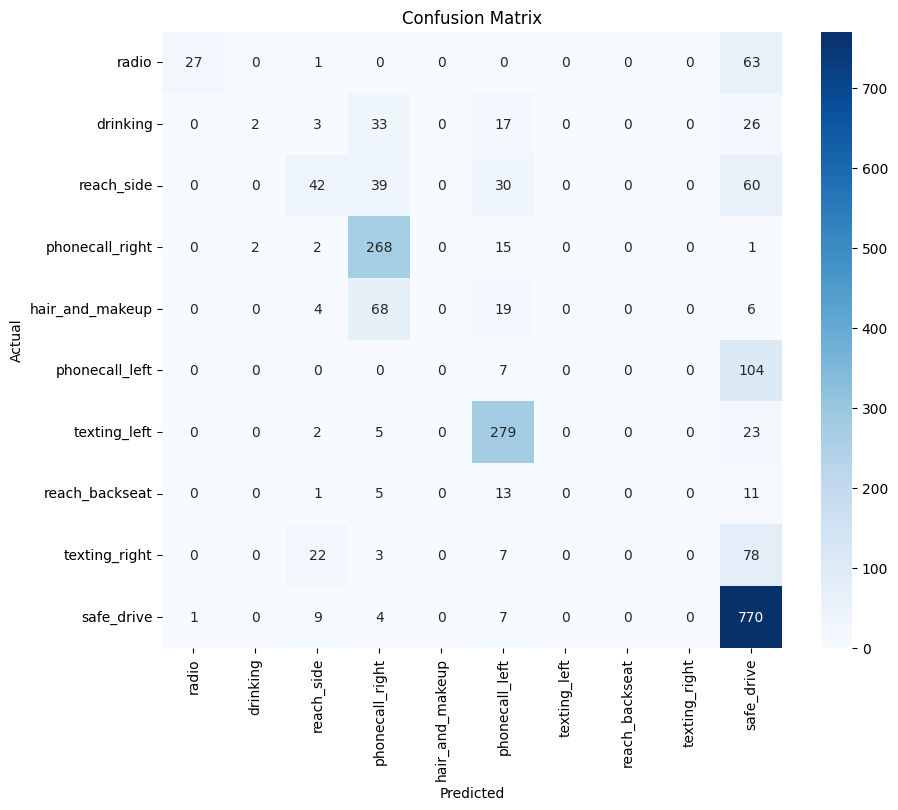

Elapsed time: 2047.89 seconds


In [ ]:
resnet_model, history= train_resnet(actions_resnet_model,actions_train_dataloader,actions_test_dataloader,actions_num_classes,actions_label_names)

In [ ]:
# # Inspect the content of history
# for key, value in history.items():
#     print(f"Key: {key}, Type: {type(value)}")
for key, value in history.items():
    print(f"Key: {key}, Example Element: {value[0] if len(value) > 0 else 'Empty'}, Type: {type(value[0]) if len(value) > 0 else 'Empty'}")


NameError: name 'history' is not defined

In [ ]:
def make_serializable(data):
    """
    Recursively convert data to JSON-serializable types.
    """
    if isinstance(data, dict):
        return {k: make_serializable(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [make_serializable(v) for v in data]
    elif isinstance(data, (np.ndarray, torch.Tensor)):
        return data.tolist()  # Convert arrays/tensors to lists
    elif isinstance(data, (float, int, str, bool, type(None))):
        return data  # Already serializable
    else:
        return str(data)  # Convert unknown types to strings


In [ ]:
serializable_history = make_serializable(history)


In [ ]:
import json
history_file = "/content/drive/My Drive/DMD/models/actions_3d_model_history.json"

with open(history_file, "w") as f:
    json.dump(serializable_history, f)

print(f"Training history saved to {history_file}")


Training history saved to /content/drive/My Drive/DMD/models/actions_3d_model_history.json


In [ ]:
gaze_resnet_model, gaze_history = train_resnet(gaze_resnet_model,gaze_train_dataloader,gaze_test_dataloader,gaze_num_classes,gaze_label_names)

  0%|          | 0/10 [00:00<?, ?it/s]

Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([122,  60]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 1/10
Train Loss: 0.1852 | Train Accuracy: 93.80% | Precision: 0.9381 | Recall: 0.9380 | F1 Score: 0.9380 | ROC AUC: 0.9797
Val Loss: 0.9630 | Val Accuracy: 71.98% | Precision: 0.7486 | Recall: 0.7198 | F1 Score: 0.7114 | ROC AUC: 0.8510

Validation ROC AUC Per Class:
Class not_looking_road: 0.8510
Class looking_road: 0.8510


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([ 68, 114]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 2/10
Train Loss: 0.2465 | Train Accuracy: 90.08% | Precision: 0.9011 | Recall: 0.9008 | F1 Score: 0.9008 | ROC AUC: 0.9636
Val Loss: 0.9375 | Val Accuracy: 75.27% | Precision: 0.7700 | Recall: 0.7527 | F1 Score: 0.7487 | ROC AUC: 0.8449

Validation ROC AUC Per Class:
Class not_looking_road: 0.8449
Class looking_road: 0.8449


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([109,  73]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 3/10
Train Loss: 0.2217 | Train Accuracy: 91.05% | Precision: 0.9105 | Recall: 0.9105 | F1 Score: 0.9105 | ROC AUC: 0.9700
Val Loss: 0.6482 | Val Accuracy: 79.12% | Precision: 0.8031 | Recall: 0.7912 | F1 Score: 0.7891 | ROC AUC: 0.8895

Validation ROC AUC Per Class:
Class not_looking_road: 0.8895
Class looking_road: 0.8895


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([102,  80]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 4/10
Train Loss: 0.1334 | Train Accuracy: 95.04% | Precision: 0.9504 | Recall: 0.9504 | F1 Score: 0.9504 | ROC AUC: 0.9887
Val Loss: 0.6209 | Val Accuracy: 78.57% | Precision: 0.7900 | Recall: 0.7857 | F1 Score: 0.7849 | ROC AUC: 0.8885

Validation ROC AUC Per Class:
Class not_looking_road: 0.8885
Class looking_road: 0.8885


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([ 72, 110]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 5/10
Train Loss: 0.1008 | Train Accuracy: 96.01% | Precision: 0.9602 | Recall: 0.9601 | F1 Score: 0.9601 | ROC AUC: 0.9943
Val Loss: 0.9109 | Val Accuracy: 81.87% | Precision: 0.8332 | Recall: 0.8187 | F1 Score: 0.8167 | ROC AUC: 0.8990

Validation ROC AUC Per Class:
Class not_looking_road: 0.8990
Class looking_road: 0.8990
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([92, 90]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 6/10
Train Loss: 0.1005 | Train Accuracy: 96.28% | Precision: 0.9628 | Recall: 0.9628 | F1 Score: 0.9628 | ROC AUC: 0.9934
Val Loss: 0.5888 | Val Accuracy: 82.97% | Precision: 0.8297 | Recall: 0.8297 | F1 Score: 0.8297 | ROC AUC: 0.9044

Validation ROC AUC Per Class:
Class not_looking_road: 0.9044
Class looking_road: 0.9044


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([ 79, 103]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 7/10
Train Loss: 0.0732 | Train Accuracy: 96.97% | Precision: 0.9697 | Recall: 0.9697 | F1 Score: 0.9697 | ROC AUC: 0.9970
Val Loss: 0.6645 | Val Accuracy: 85.71% | Precision: 0.8635 | Recall: 0.8571 | F1 Score: 0.8565 | ROC AUC: 0.9109

Validation ROC AUC Per Class:
Class not_looking_road: 0.9109
Class looking_road: 0.9109
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([94, 88]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 8/10
Train Loss: 0.0332 | Train Accuracy: 99.04% | Precision: 0.9904 | Recall: 0.9904 | F1 Score: 0.9904 | ROC AUC: 0.9994
Val Loss: 0.6382 | Val Accuracy: 84.07% | Precision: 0.8410 | Recall: 0.8407 | F1 Score: 0.8406 | ROC AUC: 0.9089

Validation ROC AUC Per Class:
Class not_looking_road: 0.9089
Class looking_road: 0.9089
No improvement. Patience counter: 2/2
Early stopping triggered. Training halted.

Confusion Matrix:


In [ ]:
import json
for key, value in gaze_history.items():
    print(f"Key: {key}, Example Element: {value[0] if len(value) > 0 else 'Empty'}, Type: {type(value[0]) if len(value) > 0 else 'Empty'}")


def make_serializable(data):
    """
    Recursively convert data to JSON-serializable types.
    """
    if isinstance(data, dict):
        return {k: make_serializable(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [make_serializable(v) for v in data]
    elif isinstance(data, (np.ndarray, torch.Tensor)):
        return data.tolist()  # Convert arrays/tensors to lists
    elif isinstance(data, (float, int, str, bool, type(None))):
        return data  # Already serializable
    else:
        return str(data)  # Convert unknown types to strings

serializable_history = make_serializable(gaze_history)

history_file = "/content/drive/My Drive/DMD/models/gaze_3d_model_history.json"

with open(history_file, "w") as f:
    json.dump(serializable_history, f)

print(f"Training history saved to {history_file}")


Key: train_loss, Example Element: 0.43506772414996076, Type: <class 'numpy.float64'>
Key: val_loss, Example Element: 0.8913771225058514, Type: <class 'numpy.float64'>
Key: train_metrics, Example Element: {'accuracy': 78.51239669421489, 'precision': 0.7853405129529349, 'recall': 0.7851239669421488, 'f1': 0.7850831916444012, 'overall_roc_auc': 0.8793570566673496, 'per_class_roc_auc': {0: 0.8793570566673498, 1: 0.8793570566673496}, 'confusion_matrix': array([[290,  73],
       [ 83, 280]])}, Type: <class 'dict'>
Key: val_metrics, Example Element: {'accuracy': 60.98901098901099, 'precision': 0.6731354642313547, 'recall': 0.6098901098901099, 'f1': 0.5706834114090169, 'overall_roc_auc': 0.6923076923076924, 'per_class_roc_auc': {0: 0.6923076923076924, 1: 0.6923076923076924}, 'confusion_matrix': array([[83,  8],
       [63, 28]])}, Type: <class 'dict'>
Training history saved to /content/drive/My Drive/DMD/models/gaze_3d_model_history.json


In [ ]:
GAZE_MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/gaze_resnet_model.pth'
torch.save(gaze_resnet_model.state_dict(), GAZE_MODEL_SAVE_PATH)


In [ ]:
torch.cuda.empty_cache()

In [ ]:
# print(hands_test_dataloader.dataset)
print(len(hands_test_dataloader))


299


In [ ]:
hands_label_names #['only_right', 'both', 'none', 'only_left']

['only_right', 'both', 'none', 'only_left']

  0%|          | 0/10 [00:00<?, ?it/s]

Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  23, 1200,  483,  680]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 1/10
Train Loss: 0.4257 | Train Accuracy: 85.94% | Precision: 0.7272 | Recall: 0.6651 | F1 Score: 0.6577 | ROC AUC: 0.9187
Val Loss: 0.3306 | Val Accuracy: 88.47% | Precision: 0.8193 | Recall: 0.7174 | F1 Score: 0.7331 | ROC AUC: 0.9576

Validation ROC AUC Per Class:
Class none: 0.8741
Class only_left: 0.9879
Class only_right: 0.9878
Class both: 0.9807


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  15, 1141,  510,  720]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 2/10
Train Loss: 0.3152 | Train Accuracy: 89.95% | Precision: 0.8297 | Recall: 0.7417 | F1 Score: 0.7581 | ROC AUC: 0.9452
Val Loss: 0.2184 | Val Accuracy: 93.00% | Precision: 0.9449 | Recall: 0.7616 | F1 Score: 0.7777 | ROC AUC: 0.9739

Validation ROC AUC Per Class:
Class none: 0.9118
Class only_left: 0.9938
Class only_right: 0.9963
Class both: 0.9936


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  73, 1000,  447,  866]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 3/10
Train Loss: 0.2032 | Train Accuracy: 93.80% | Precision: 0.8927 | Recall: 0.8133 | F1 Score: 0.8371 | ROC AUC: 0.9668
Val Loss: 0.2254 | Val Accuracy: 93.34% | Precision: 0.8744 | Recall: 0.8484 | F1 Score: 0.8586 | ROC AUC: 0.9747

Validation ROC AUC Per Class:
Class none: 0.9167
Class only_left: 0.9932
Class only_right: 0.9955
Class both: 0.9932
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  65, 1079,  461,  781]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 4/10
Train Loss: 0.1526 | Train Accuracy: 95.35% | Precision: 0.9102 | Recall: 0.8501 | F1 Score: 0.8720 | ROC AUC: 0.9807
Val Loss: 0.1373 | Val Accuracy: 96.02% | Precision: 0.9324 | Recall: 0.8807 | F1 Score: 0.9018 | ROC AUC: 0.9818

Validation ROC AUC Per Class:
Class none: 0.9362
Class only_left: 0.9965
Class only_right: 0.9980
Class both: 0.9965


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([ 103, 1231,  443,  609]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 5/10
Train Loss: 0.1150 | Train Accuracy: 96.60% | Precision: 0.9351 | Recall: 0.8798 | F1 Score: 0.9013 | ROC AUC: 0.9848
Val Loss: 0.3743 | Val Accuracy: 90.15% | Precision: 0.8525 | Recall: 0.8467 | F1 Score: 0.8447 | ROC AUC: 0.9780

Validation ROC AUC Per Class:
Class none: 0.9328
Class only_left: 0.9920
Class only_right: 0.9976
Class both: 0.9898
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  66, 1067,  473,  780]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 6/10
Train Loss: 0.0882 | Train Accuracy: 97.28% | Precision: 0.9465 | Recall: 0.9092 | F1 Score: 0.9253 | ROC AUC: 0.9931
Val Loss: 0.1101 | Val Accuracy: 96.65% | Precision: 0.9370 | Recall: 0.8908 | F1 Score: 0.9095 | ROC AUC: 0.9884

Validation ROC AUC Per Class:
Class none: 0.9613
Class only_left: 0.9969
Class only_right: 0.9985
Class both: 0.9969


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  52, 1091,  455,  788]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 7/10
Train Loss: 0.0633 | Train Accuracy: 97.92% | Precision: 0.9541 | Recall: 0.9262 | F1 Score: 0.9388 | ROC AUC: 0.9962
Val Loss: 0.1261 | Val Accuracy: 96.56% | Precision: 0.9561 | Recall: 0.8676 | F1 Score: 0.8988 | ROC AUC: 0.9871

Validation ROC AUC Per Class:
Class none: 0.9555
Class only_left: 0.9965
Class only_right: 0.9989
Class both: 0.9976
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  86, 1058,  465,  777]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 8/10
Train Loss: 0.0434 | Train Accuracy: 98.55% | Precision: 0.9682 | Recall: 0.9445 | F1 Score: 0.9554 | ROC AUC: 0.9981
Val Loss: 0.1010 | Val Accuracy: 97.15% | Precision: 0.9262 | Recall: 0.9208 | F1 Score: 0.9234 | ROC AUC: 0.9915

Validation ROC AUC Per Class:
Class none: 0.9714
Class only_left: 0.9977
Class only_right: 0.9992
Class both: 0.9977


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78330e9e5fc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78330e9e5fc0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    
if w.is_alive():  File "/usr/lib/


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  83, 1056,  461,  786]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 9/10
Train Loss: 0.0257 | Train Accuracy: 99.03% | Precision: 0.9738 | Recall: 0.9598 | F1 Score: 0.9665 | ROC AUC: 0.9990
Val Loss: 0.0994 | Val Accuracy: 97.44% | Precision: 0.9358 | Recall: 0.9236 | F1 Score: 0.9293 | ROC AUC: 0.9921

Validation ROC AUC Per Class:
Class none: 0.9735
Class only_left: 0.9976
Class only_right: 0.9993
Class both: 0.9979


Training Step:   0%|          | 0/1193 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/299 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3]), array([  90, 1069,  460,  767]))
Prediction Distribution: (array([0, 1, 2, 3]), array([  86, 1059,  466,  775]))
Confusion Matrix Totals: [  90 1069  460  767]
Total Samples Processed: 2386
Epoch: 10/10
Train Loss: 0.0145 | Train Accuracy: 99.55% | Precision: 0.9868 | Recall: 0.9804 | F1 Score: 0.9835 | ROC AUC: 0.9998
Val Loss: 0.0925 | Val Accuracy: 97.61% | Precision: 0.9332 | Recall: 0.9278 | F1 Score: 0.9304 | ROC AUC: 0.9925

Validation ROC AUC Per Class:
Class none: 0.9742
Class only_left: 0.9983
Class only_right: 0.9993
Class both: 0.9983

Confusion Matrix:


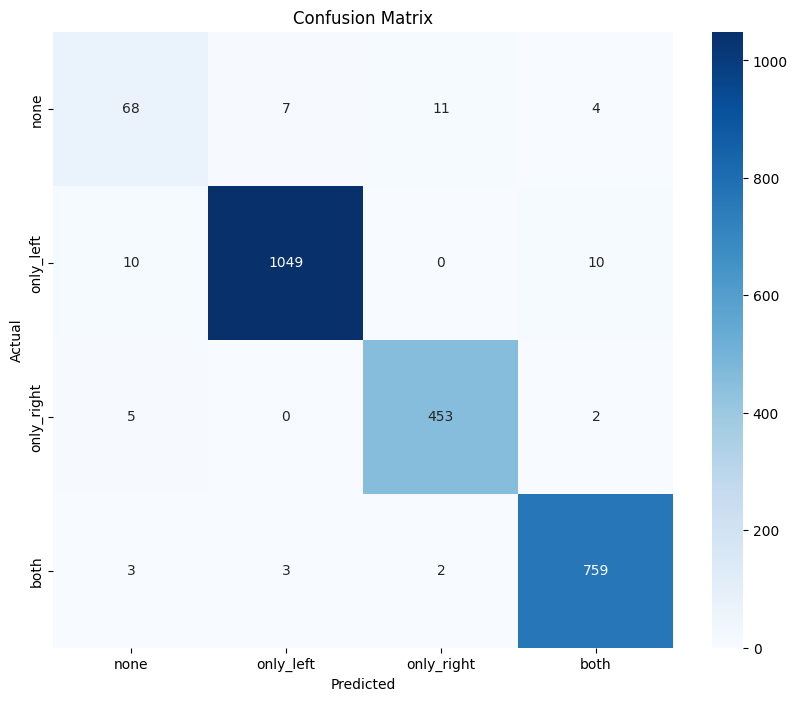

Elapsed time: 13379.11 seconds


In [ ]:
hands_resnet_model, hands_history= train_resnet(hands_resnet_model,hands_train_dataloader,hands_test_dataloader,hands_num_classes,hands_label_names)

In [ ]:
# Testing: 2386 videos (Counter({'only_left': 1069, 'both': 767, 'only_right': 460, 'none': 90}))

In [ ]:
import json
for key, value in hands_history.items():
    print(f"Key: {key}, Example Element: {value[0] if len(value) > 0 else 'Empty'}, Type: {type(value[0]) if len(value) > 0 else 'Empty'}")


def make_serializable(data):
    """
    Recursively convert data to JSON-serializable types.
    """
    if isinstance(data, dict):
        return {k: make_serializable(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [make_serializable(v) for v in data]
    elif isinstance(data, (np.ndarray, torch.Tensor)):
        return data.tolist()  # Convert arrays/tensors to lists
    elif isinstance(data, (float, int, str, bool, type(None))):
        return data  # Already serializable
    else:
        return str(data)  # Convert unknown types to strings

serializable_history = make_serializable(hands_history)

history_file = "/content/drive/My Drive/DMD/models/hands_3d_model_history.json"

with open(history_file, "w") as f:
    json.dump(serializable_history, f)

print(f"Training history saved to {history_file}")


Key: train_loss, Example Element: 0.4257412190679445, Type: <class 'numpy.float64'>
Key: val_loss, Example Element: 0.3305563166329519, Type: <class 'numpy.float64'>
Key: train_metrics, Example Element: {'accuracy': 85.93586250262, 'precision': 0.7272209811916253, 'recall': 0.6650821593266036, 'f1': 0.6576684011004235, 'overall_roc_auc': 0.9187258335039652, 'per_class_roc_auc': {0: 0.7711089329364216, 1: 0.9688846253346168, 2: 0.9726425944934909, 3: 0.9622671812513317}, 'confusion_matrix': array([[   6,  181,   98,   75],
       [   2, 3985,   75,  213],
       [   5,  109, 1559,  166],
       [   4,  247,  167, 2650]])}, Type: <class 'dict'>
Key: val_metrics, Example Element: {'accuracy': 88.47443419949707, 'precision': 0.8193078644501279, 'recall': 0.7173502650870462, 'f1': 0.733050588166615, 'overall_roc_auc': 0.9576254986084224, 'per_class_roc_auc': {0: 0.874104723190089, 1: 0.9879257575079571, 2: 0.9878075759627974, 3: 0.9806639377728459}, 'confusion_matrix': array([[  14,   32,  

In [ ]:
MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/resnet_model.pth'
torch.save(resnet_model.state_dict(), MODEL_SAVE_PATH)

GAZE_MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/gaze_resnet_model.pth'
torch.save(gaze_resnet_model.state_dict(), GAZE_MODEL_SAVE_PATH)

HANDS_MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/hands_resnet_model.pth'
torch.save(gaze_resnet_model.state_dict(), HANDS_MODEL_SAVE_PATH)

# Optional: Save the optimizer state_dict
# OPTIMIZER_SAVE_PATH = '/content/drive/My Drive/optimizer.pth'
# torch.save(optimizer.state_dict(), OPTIMIZER_SAVE_PATH)

print(f"Model saved at {MODEL_SAVE_PATH}")

NameError: name 'resnet_model' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Plot loss curves
def plot_loss_curves(history):
    train_loss = history["train_loss"]
    val_loss = history["val_loss"]

    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, label="Training Loss", marker='o')
    plt.plot(val_loss, label="Validation Loss", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Curves")
    plt.legend()
    plt.grid()
    plt.show()

# plot_loss_curves(hands_history)
# Plot accuracy curves
def plot_accuracy_curves(history):
    train_accuracy = [metrics["accuracy"] for metrics in history["train_metrics"]]
    val_accuracy = [metrics["accuracy"] for metrics in history["val_metrics"]]

    plt.figure(figsize=(10, 6))
    plt.plot(train_accuracy, label="Training Accuracy", marker='o')
    plt.plot(val_accuracy, label="Validation Accuracy", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Curves")
    plt.legend()
    plt.grid()
    plt.show()

# plot_accuracy_curves(hands_history)
# Plot ROC AUC curves
def plot_roc_auc(history, label_names):
    train_roc_auc = [metrics["overall_roc_auc"] for metrics in history["train_metrics"]]
    val_roc_auc = [metrics["overall_roc_auc"] for metrics in history["val_metrics"]]

    plt.figure(figsize=(10, 6))
    plt.plot(train_roc_auc, label="Training ROC AUC", marker='o')
    plt.plot(val_roc_auc, label="Validation ROC AUC", marker='o')
    plt.xlabel("Epochs")
    plt.ylabel("ROC AUC")
    plt.title("ROC AUC Curves")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
# plot_roc_auc(hands_history, hands_label_names)
# Plot per-class ROC AUC
def plot_per_class_roc_auc(history, label_names, epoch=-1):
    # Get metrics for the desired epoch
    val_metrics = history["val_metrics"][epoch]
    per_class_roc_auc = val_metrics["per_class_roc_auc"]

    # Extract class names and their ROC AUCs
    class_names = label_names
    roc_auc_values = [per_class_roc_auc[class_idx] for class_idx in range(len(class_names))]

    plt.figure(figsize=(12, 6))
    plt.bar(class_names, roc_auc_values, color='skyblue')
    plt.xlabel("Class")
    plt.ylabel("ROC AUC")
    plt.title(f"Per-Class ROC AUC (Epoch {epoch+1})")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()

# Example usage
# plot_per_class_roc_auc(hands_history, hands_label_names)


In [ ]:
# Combine all plots in one function
def plot_training_summary(history, label_names):
    plot_loss_curves(history)
    plot_accuracy_curves(history)
    plot_roc_auc(history, label_names)
    plot_per_class_roc_auc(history, label_names)

# Example usage



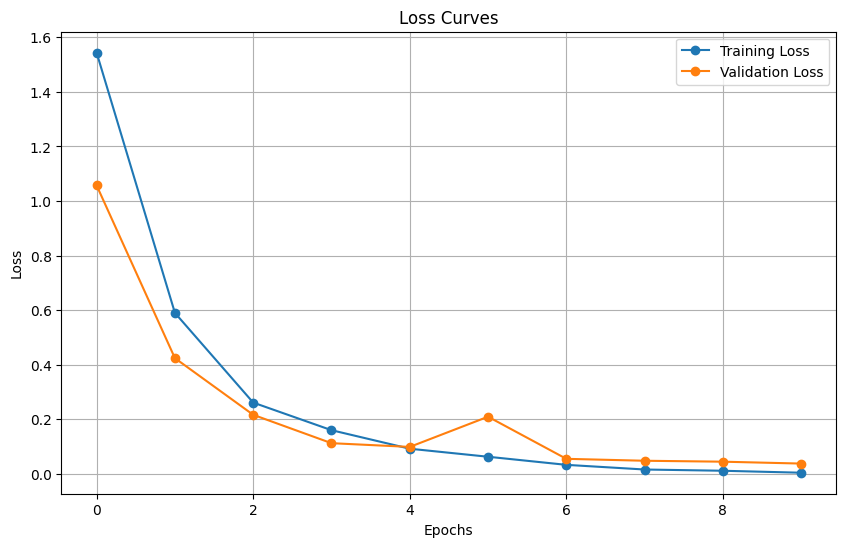

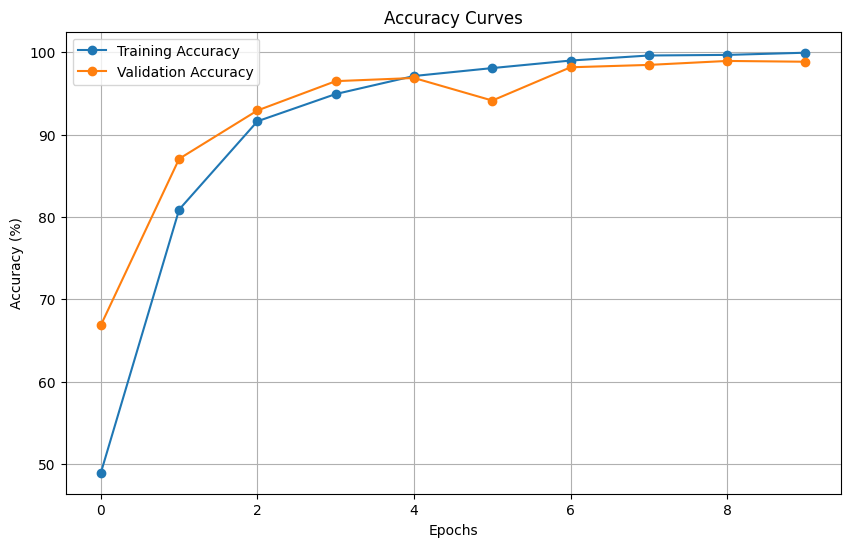

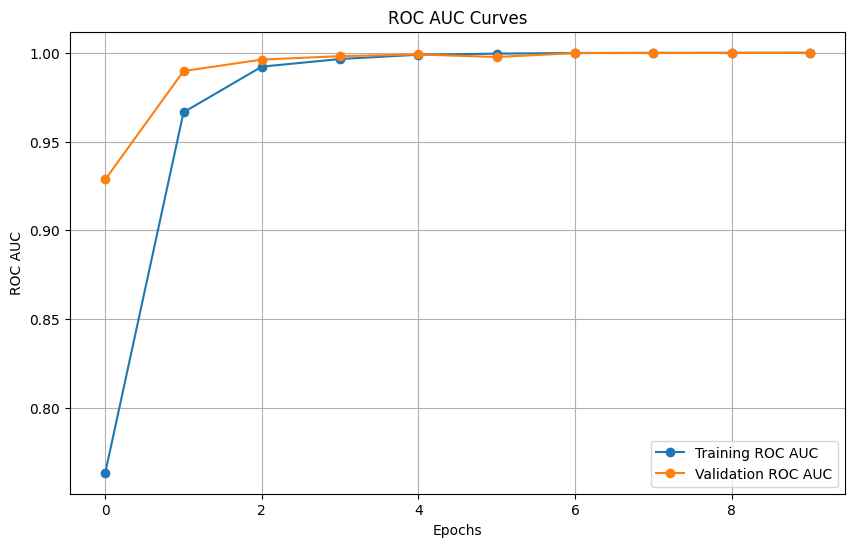

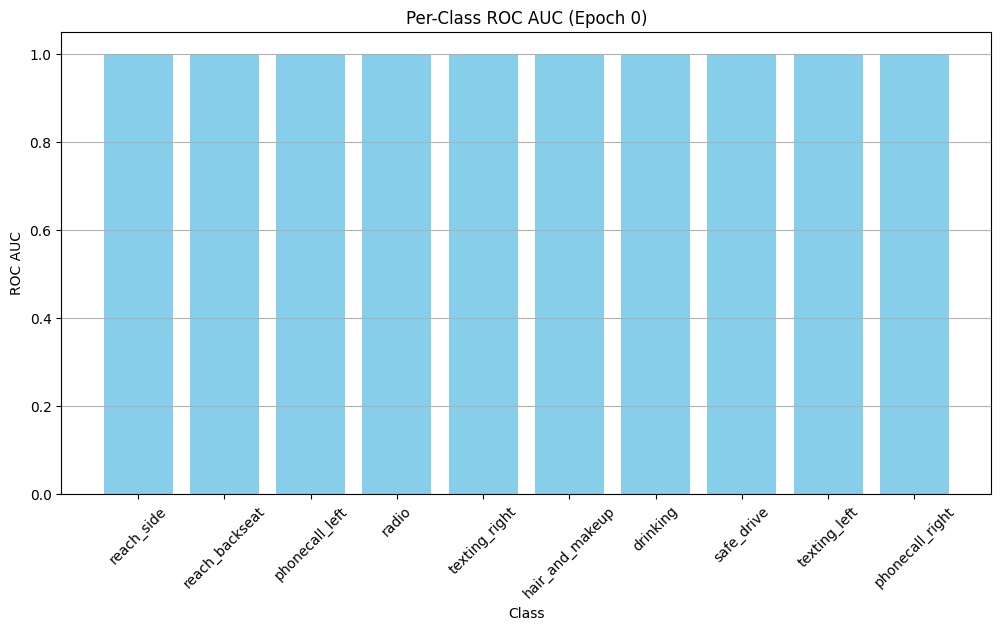

In [ ]:
plot_training_summary(history, actions_label_names)

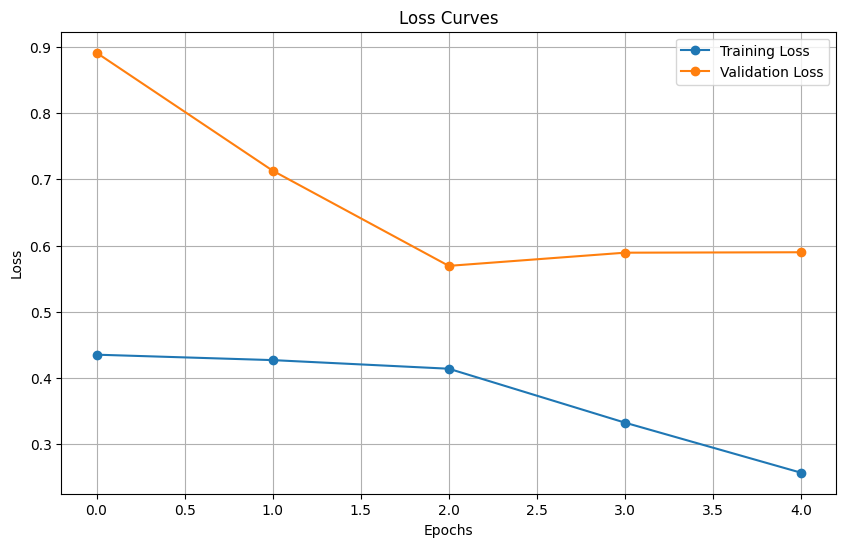

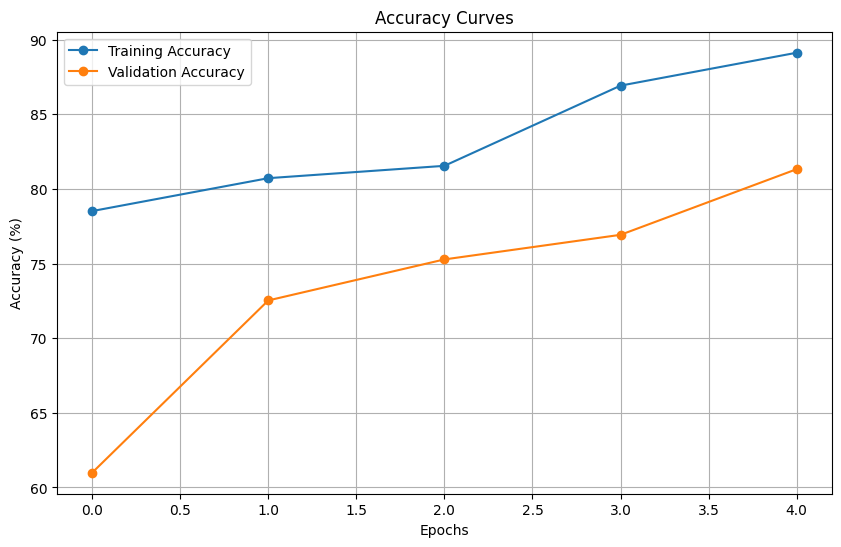

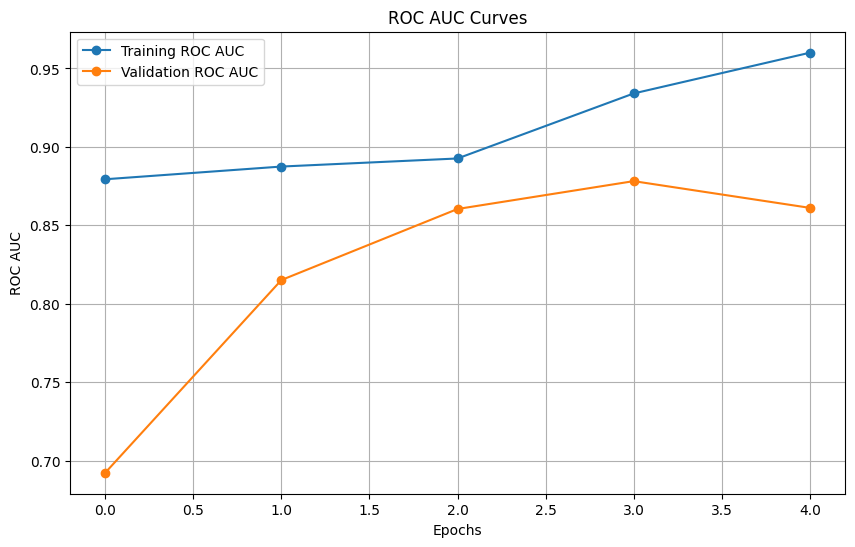

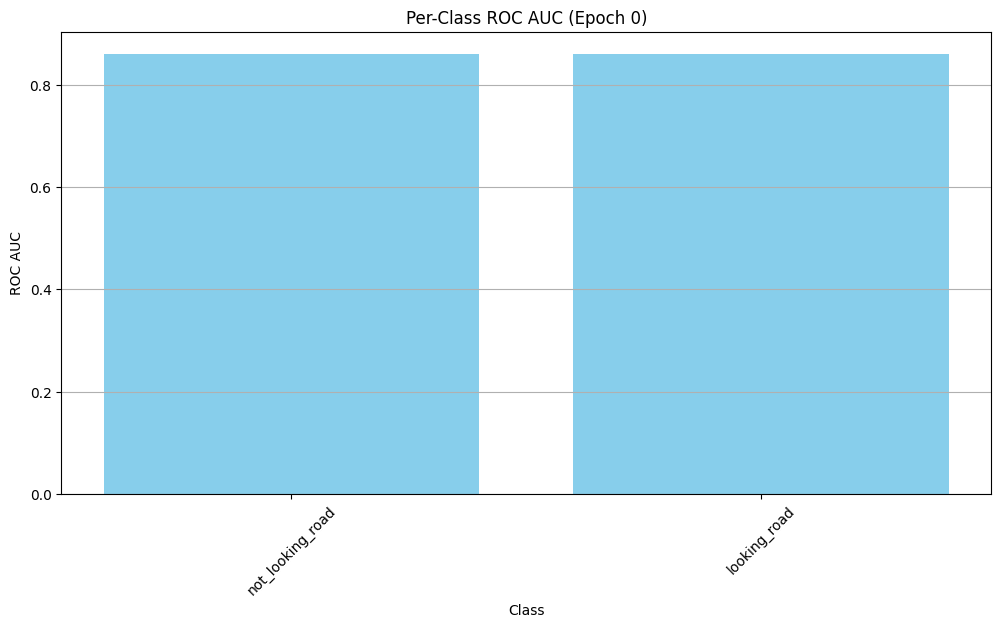

In [ ]:
plot_training_summary(gaze_history, gaze_label_names)

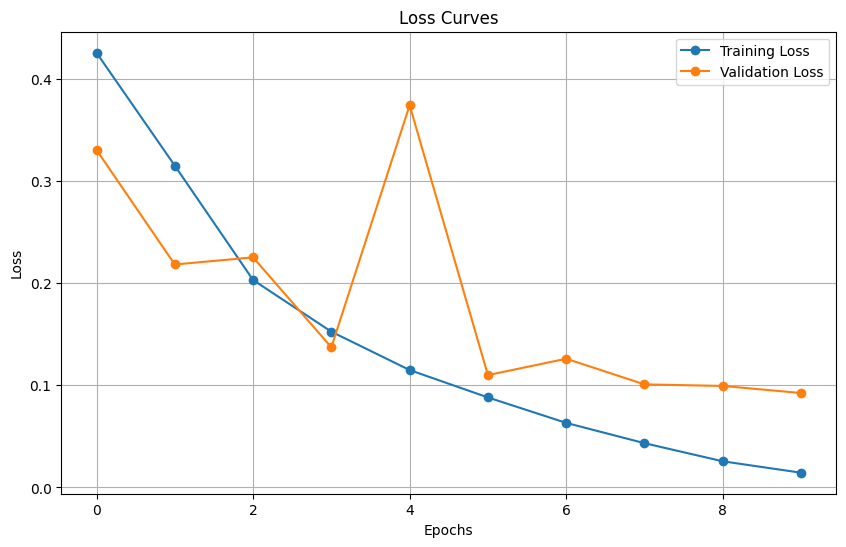

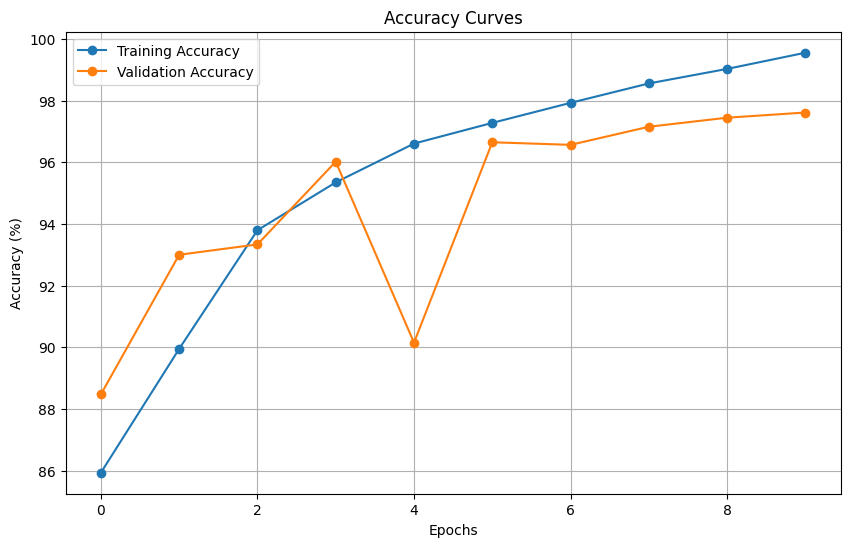

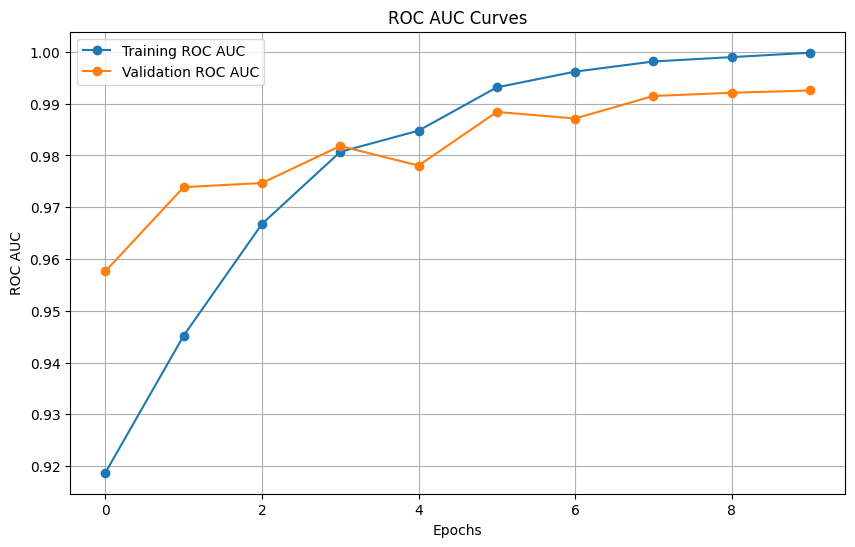

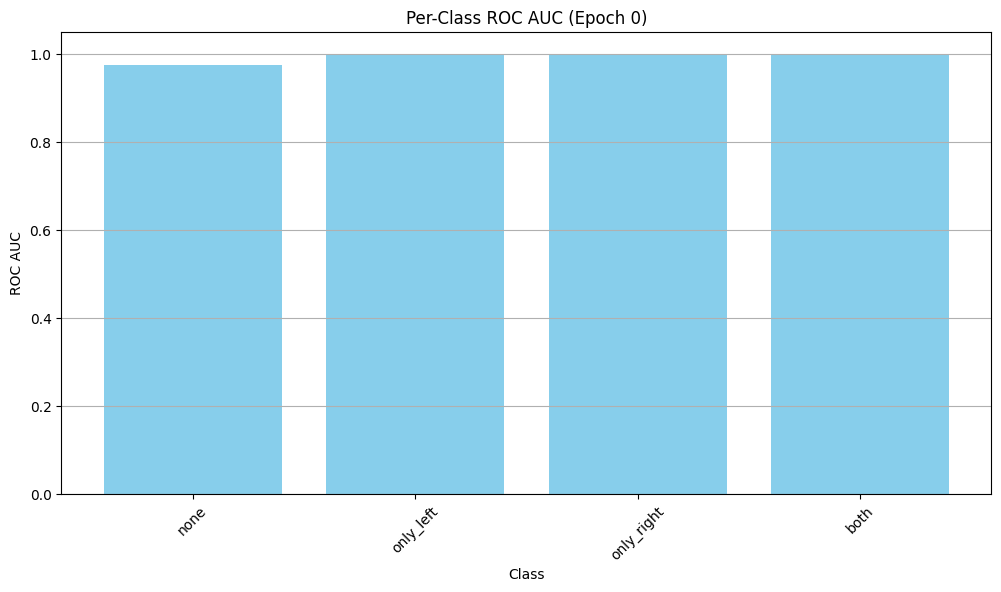

In [ ]:
plot_training_summary(hands_history, hands_label_names)

In [ ]:
HANDS_MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/hands_resnet_model.pth'
torch.save(gaze_resnet_model.state_dict(), HANDS_MODEL_SAVE_PATH)

  0%|          | 0/10 [00:00<?, ?it/s]

Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 6, 9]), array([626, 296, 607,  94, 111, 112, 233]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 1/10
Train Loss: 1.3171 | Train Accuracy: 56.39% | Precision: 0.4305 | Recall: 0.3381 | F1 Score: 0.3499 | ROC AUC: 0.8447
Val Loss: 1.2976 | Val Accuracy: 61.62% | Precision: 0.4410 | Recall: 0.5062 | F1 Score: 0.4354 | ROC AUC: 0.9246

Validation ROC AUC Per Class:
Class safe_drive: 0.9350
Class drinking: 0.9075
Class phonecall_left: 0.9225
Class radio: 0.9900
Class texting_right: 0.9357
Class hair_and_makeup: 0.9623
Class phonecall_right: 0.9196
Class reach_backseat: 0.8918
Class texting_left: 0.8241
Class reach_side: 0.9570


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b158724b7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b158724b7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([721, 121, 232, 106,  87,  32, 395,   1, 113, 271]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 2/10
Train Loss: 0.7972 | Train Accuracy: 73.70% | Precision: 0.6428 | Recall: 0.5806 | F1 Score: 0.5998 | ROC AUC: 0.9448
Val Loss: 0.7207 | Val Accuracy: 75.95% | Precision: 0.7607 | Recall: 0.6506 | F1 Score: 0.6337 | ROC AUC: 0.9610

Validation ROC AUC Per Class:
Class safe_drive: 0.9527
Class drinking: 0.9322
Class phonecall_left: 0.9597
Class radio: 0.9959
Class texting_right: 0.9652
Class hair_and_makeup: 0.9831
Class phonecall_right: 0.9823
Class reach_backseat: 0.8640
Class texting_left: 0.9884
Class reach_side: 0.9868


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([795,  13, 298,  94,  86, 176, 262,   5, 145, 205]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 3/10
Train Loss: 0.5497 | Train Accuracy: 82.12% | Precision: 0.7408 | Recall: 0.6966 | F1 Score: 0.7137 | ROC AUC: 0.9695
Val Loss: 0.3959 | Val Accuracy: 86.05% | Precision: 0.8277 | Recall: 0.7309 | F1 Score: 0.7187 | ROC AUC: 0.9867

Validation ROC AUC Per Class:
Class safe_drive: 0.9868
Class drinking: 0.9581
Class phonecall_left: 0.9924
Class radio: 0.9988
Class texting_right: 0.9892
Class hair_and_makeup: 0.9734
Class phonecall_right: 0.9962
Class reach_backseat: 0.9844
Class texting_left: 0.9930
Class reach_side: 0.9946


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([837, 143, 289,  91,  80,  33, 301,   6, 119, 180]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 4/10
Train Loss: 0.4490 | Train Accuracy: 85.35% | Precision: 0.7955 | Recall: 0.7553 | F1 Score: 0.7712 | ROC AUC: 0.9798
Val Loss: 0.3178 | Val Accuracy: 88.84% | Precision: 0.8635 | Recall: 0.7622 | F1 Score: 0.7690 | ROC AUC: 0.9904

Validation ROC AUC Per Class:
Class safe_drive: 0.9921
Class drinking: 0.9834
Class phonecall_left: 0.9951
Class radio: 0.9997
Class texting_right: 0.9904
Class hair_and_makeup: 0.9869
Class phonecall_right: 0.9968
Class reach_backseat: 0.9691
Class texting_left: 0.9972
Class reach_side: 0.9936


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([683,  85, 332,  85, 192, 102, 283,  12, 115, 190]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 5/10
Train Loss: 0.3320 | Train Accuracy: 89.51% | Precision: 0.8490 | Recall: 0.8170 | F1 Score: 0.8312 | ROC AUC: 0.9877
Val Loss: 0.2855 | Val Accuracy: 90.38% | Precision: 0.8678 | Recall: 0.8666 | F1 Score: 0.8496 | ROC AUC: 0.9946

Validation ROC AUC Per Class:
Class safe_drive: 0.9944
Class drinking: 0.9879
Class phonecall_left: 0.9970
Class radio: 0.9992
Class texting_right: 0.9972
Class hair_and_makeup: 0.9942
Class phonecall_right: 0.9994
Class reach_backseat: 0.9810
Class texting_left: 0.9987
Class reach_side: 0.9972


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b158724b7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7b158724b7f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([812,  93, 313,  87, 122,  59, 289,   4, 103, 197]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 6/10
Train Loss: 0.2624 | Train Accuracy: 92.05% | Precision: 0.8911 | Recall: 0.8607 | F1 Score: 0.8737 | ROC AUC: 0.9920
Val Loss: 0.1969 | Val Accuracy: 93.65% | Precision: 0.9295 | Recall: 0.8300 | F1 Score: 0.8407 | ROC AUC: 0.9960

Validation ROC AUC Per Class:
Class safe_drive: 0.9966
Class drinking: 0.9906
Class phonecall_left: 0.9982
Class radio: 0.9990
Class texting_right: 0.9979
Class hair_and_makeup: 0.9972
Class phonecall_right: 0.9991
Class reach_backseat: 0.9850
Class texting_left: 0.9987
Class reach_side: 0.9973


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([774,  58, 303,  87, 124, 111, 296,  18, 111, 197]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 7/10
Train Loss: 0.2019 | Train Accuracy: 93.99% | Precision: 0.9178 | Recall: 0.8909 | F1 Score: 0.9027 | ROC AUC: 0.9951
Val Loss: 0.1459 | Val Accuracy: 95.53% | Precision: 0.9311 | Recall: 0.8998 | F1 Score: 0.9076 | ROC AUC: 0.9983

Validation ROC AUC Per Class:
Class safe_drive: 0.9979
Class drinking: 0.9974
Class phonecall_left: 0.9990
Class radio: 0.9997
Class texting_right: 0.9994
Class hair_and_makeup: 0.9975
Class phonecall_right: 0.9996
Class reach_backseat: 0.9937
Class texting_left: 0.9998
Class reach_side: 0.9986


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([778,  74, 305,  90, 117,  97, 296,  21, 119, 182]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 8/10
Train Loss: 0.1384 | Train Accuracy: 95.86% | Precision: 0.9407 | Recall: 0.9214 | F1 Score: 0.9304 | ROC AUC: 0.9975
Val Loss: 0.0966 | Val Accuracy: 96.87% | Precision: 0.9511 | Recall: 0.9329 | F1 Score: 0.9391 | ROC AUC: 0.9986

Validation ROC AUC Per Class:
Class safe_drive: 0.9986
Class drinking: 0.9987
Class phonecall_left: 0.9995
Class radio: 0.9995
Class texting_right: 0.9997
Class hair_and_makeup: 0.9992
Class phonecall_right: 0.9997
Class reach_backseat: 0.9923
Class texting_left: 0.9996
Class reach_side: 0.9991


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([775,  86, 307,  90, 113,  96, 289,  16, 124, 183]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 9/10
Train Loss: 0.0847 | Train Accuracy: 97.51% | Precision: 0.9629 | Recall: 0.9480 | F1 Score: 0.9552 | ROC AUC: 0.9989
Val Loss: 0.0915 | Val Accuracy: 97.26% | Precision: 0.9594 | Recall: 0.9336 | F1 Score: 0.9389 | ROC AUC: 0.9988

Validation ROC AUC Per Class:
Class safe_drive: 0.9988
Class drinking: 0.9980
Class phonecall_left: 0.9997
Class radio: 0.9998
Class texting_right: 0.9999
Class hair_and_makeup: 0.9991
Class phonecall_right: 0.9998
Class reach_backseat: 0.9941
Class texting_left: 0.9998
Class reach_side: 0.9997


Training Step:   0%|          | 0/1040 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/260 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([791,  81, 309,  91, 110,  97, 288,  30, 111, 171]))
Prediction Distribution: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([785,  74, 312,  89, 113,  98, 291,  23, 118, 176]))
Confusion Matrix Totals: [791  81 309  91 110  97 288  30 111 171]
Total Samples Processed: 2079
Epoch: 10/10
Train Loss: 0.0604 | Train Accuracy: 98.47% | Precision: 0.9807 | Recall: 0.9669 | F1 Score: 0.9733 | ROC AUC: 0.9997
Val Loss: 0.0717 | Val Accuracy: 97.59% | Precision: 0.9628 | Recall: 0.9442 | F1 Score: 0.9518 | ROC AUC: 0.9991

Validation ROC AUC Per Class:
Class safe_drive: 0.9991
Class drinking: 0.9979
Class phonecall_left: 0.9998
Class radio: 0.9999
Class texting_right: 0.9997
Class hair_and_makeup: 0.9993
Class phonecall_right: 0.9999
Class reach_backseat: 0.9959
Class texting_left: 0.9999
Class reach_side: 0.9997

Confusion Matrix:


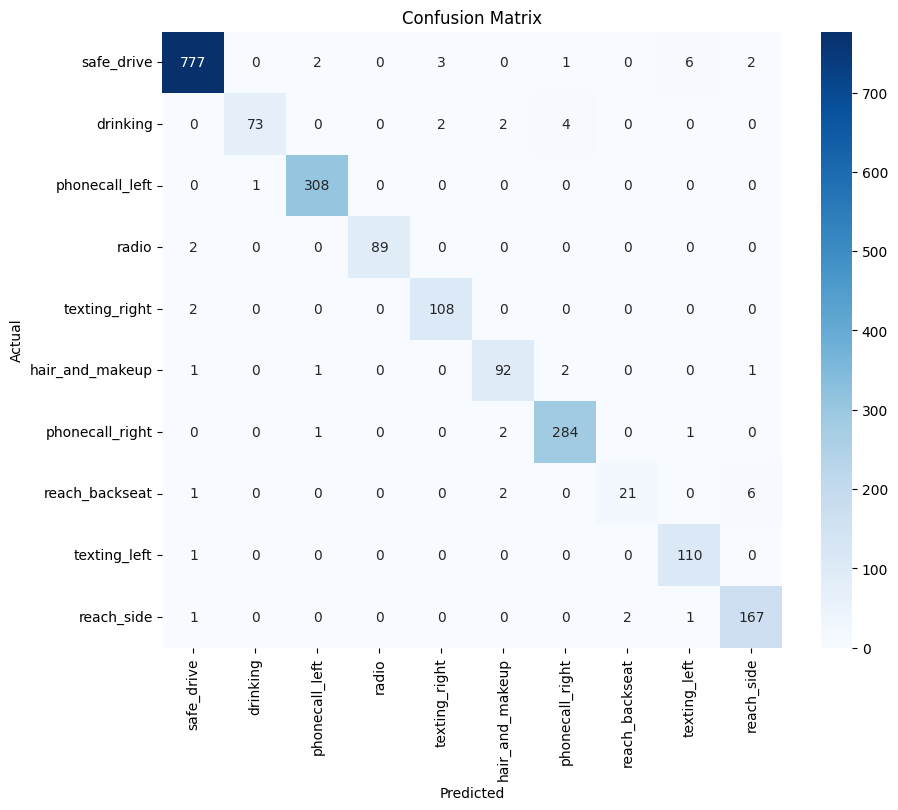

Elapsed time: 15651.64 seconds


In [ ]:
# actions_moblienet_model = build_moblienet_model(actions_num_classes, device, dtype)
# gaze_moblienet_model = build_moblienet_model(gaze_num_classes, device, dtype)
# hands_moblienet_model = build_moblienet_model(hands_num_classes, device, dtype)
actions_moblienet_model, actions_moblienet_history= train_resnet(actions_moblienet_model,actions_train_dataloader,actions_test_dataloader,actions_num_classes,actions_label_names)

In [ ]:
MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/actions_moblienet_model.pth'
torch.save(actions_moblienet_model.state_dict(), MODEL_SAVE_PATH)

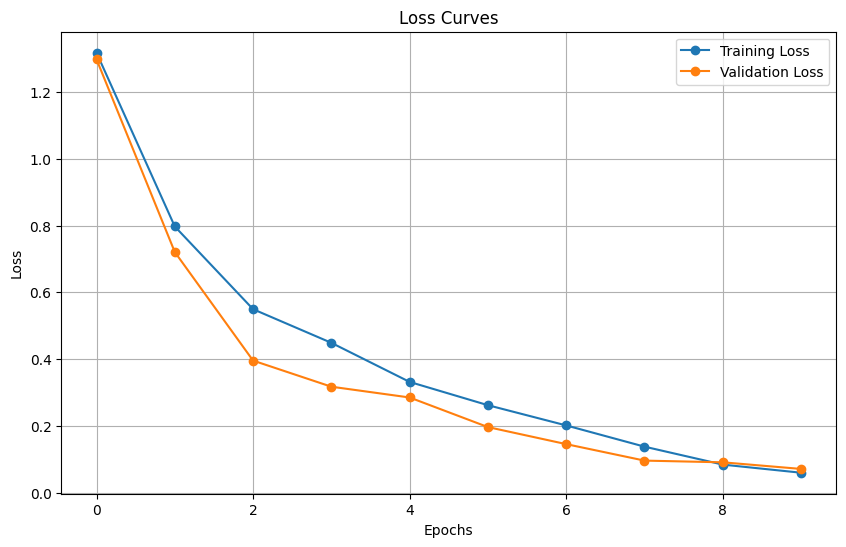

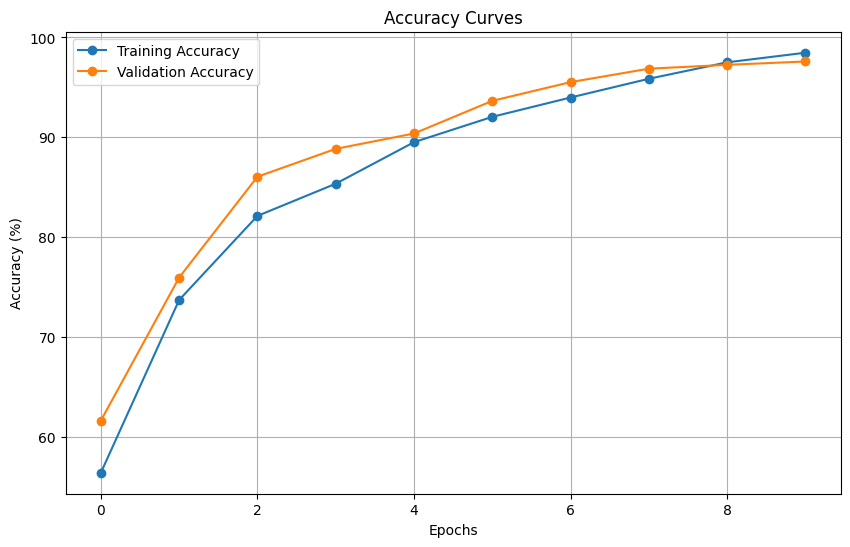

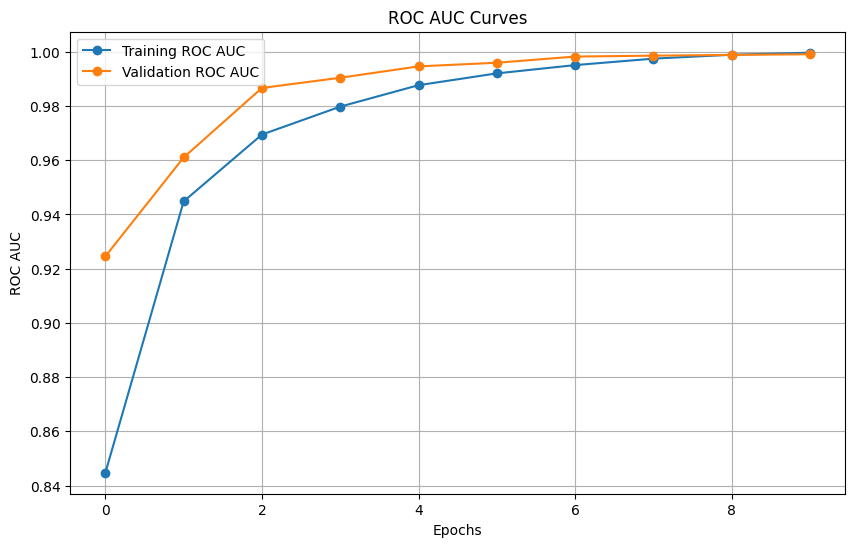

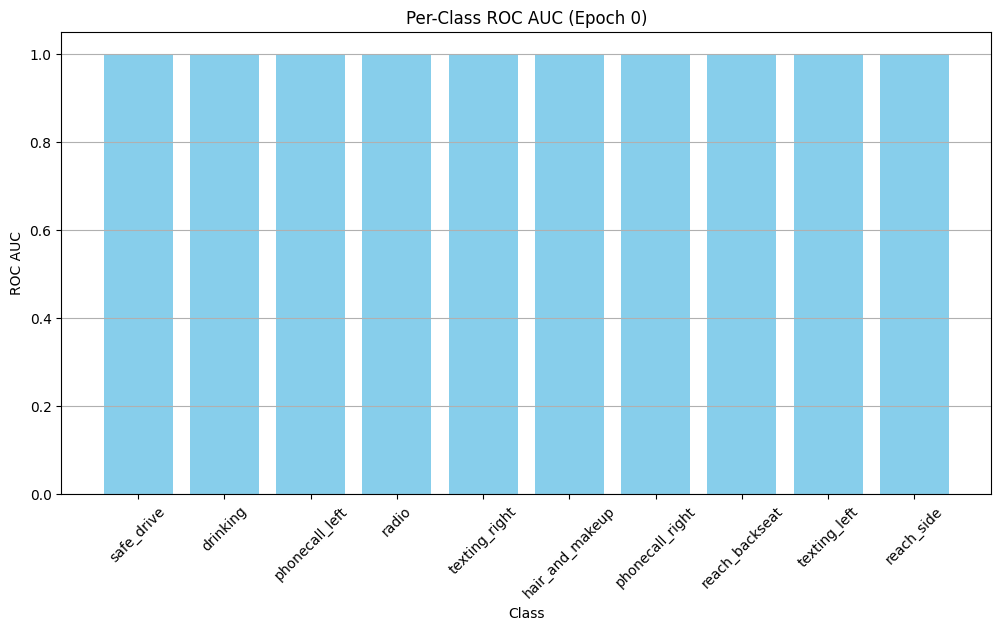

In [ ]:
plot_training_summary(actions_moblienet_history, actions_label_names)

In [ ]:
gaze_moblienet_history

NameError: name 'gaze_moblienet_history' is not defined

  0%|          | 0/10 [00:00<?, ?it/s]

Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0]), array([182]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 1/10
Train Loss: 0.6876 | Train Accuracy: 58.95% | Precision: 0.5897 | Recall: 0.5895 | F1 Score: 0.5893 | ROC AUC: 0.6228
Val Loss: 3.5498 | Val Accuracy: 50.00% | Precision: 0.2500 | Recall: 0.5000 | F1 Score: 0.3333 | ROC AUC: 0.6312

Validation ROC AUC Per Class:
Class not_looking_road: 0.6312
Class looking_road: 0.6312


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([ 45, 137]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 2/10
Train Loss: 0.6619 | Train Accuracy: 60.06% | Precision: 0.6008 | Recall: 0.6006 | F1 Score: 0.6003 | ROC AUC: 0.6441
Val Loss: 0.7033 | Val Accuracy: 52.75% | Precision: 0.5369 | Recall: 0.5275 | F1 Score: 0.4952 | ROC AUC: 0.5665

Validation ROC AUC Per Class:
Class not_looking_road: 0.5665
Class looking_road: 0.5665


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([1]), array([182]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 3/10
Train Loss: 0.6436 | Train Accuracy: 61.29% | Precision: 0.6143 | Recall: 0.6129 | F1 Score: 0.6118 | ROC AUC: 0.6680
Val Loss: 0.8878 | Val Accuracy: 50.00% | Precision: 0.2500 | Recall: 0.5000 | F1 Score: 0.3333 | ROC AUC: 0.7653

Validation ROC AUC Per Class:
Class not_looking_road: 0.7654
Class looking_road: 0.7653
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([ 76, 106]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 4/10
Train Loss: 0.6245 | Train Accuracy: 66.67% | Precision: 0.6667 | Recall: 0.6667 | F1 Score: 0.6666 | ROC AUC: 0.7264
Val Loss: 0.5478 | Val Accuracy: 71.98% | Precision: 0.7259 | Recall: 0.7198 | F1 Score: 0.7179 | ROC AUC: 0.7843

Validation ROC AUC Per Class:
Class not_looking_road: 0.7843
Class looking_road: 0.7843


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([144,  38]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 5/10
Train Loss: 0.5783 | Train Accuracy: 70.80% | Precision: 0.7080 | Recall: 0.7080 | F1 Score: 0.7080 | ROC AUC: 0.7684
Val Loss: 0.5717 | Val Accuracy: 66.48% | Precision: 0.7495 | Recall: 0.6648 | F1 Score: 0.6338 | ROC AUC: 0.8725

Validation ROC AUC Per Class:
Class not_looking_road: 0.8725
Class looking_road: 0.8725
No improvement. Patience counter: 1/2


Training Step:   0%|          | 0/91 [00:00<?, ?it/s]

Testing Step:   0%|          | 0/23 [00:00<?, ?it/s]


Debugging Information:
Ground Truth Distribution: (array([0, 1]), array([91, 91]))
Prediction Distribution: (array([0, 1]), array([ 32, 150]))
Confusion Matrix Totals: [91 91]
Total Samples Processed: 182
Epoch: 6/10
Train Loss: 0.5600 | Train Accuracy: 74.52% | Precision: 0.7468 | Recall: 0.7452 | F1 Score: 0.7448 | ROC AUC: 0.7896
Val Loss: 0.6625 | Val Accuracy: 65.38% | Precision: 0.7654 | Recall: 0.6538 | F1 Score: 0.6132 | ROC AUC: 0.7357

Validation ROC AUC Per Class:
Class not_looking_road: 0.7358
Class looking_road: 0.7357
No improvement. Patience counter: 2/2
Early stopping triggered. Training halted.

Confusion Matrix:


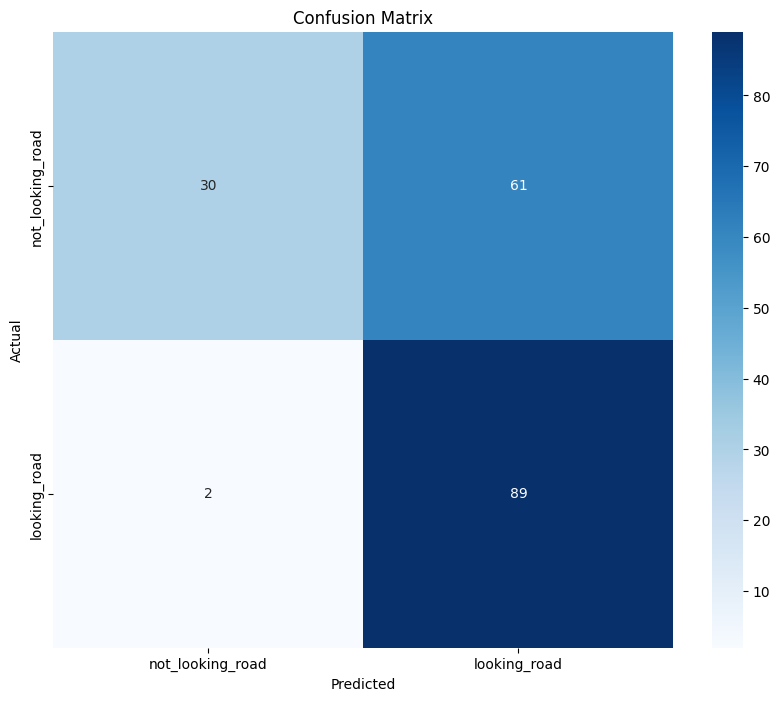

Elapsed time: 976.78 seconds


In [ ]:
gaze_moblienet_model, gaze_moblienet_history= train_resnet(gaze_moblienet_model,gaze_train_dataloader,gaze_test_dataloader,gaze_num_classes,gaze_label_names)

In [ ]:
plot_training_summary(gaze_moblienet_history, gaze_label_names)

NameError: name 'plot_training_summary' is not defined

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Train Loss: 0.7806 | Train Accuracy: 71.99% | Precision: 0.5248 | Recall: 0.5305 | F1 Score: 0.5261 | ROC AUC: 0.7930
Val Loss: 2.8199 | Val Accuracy: 46.35% | Precision: 0.4550 | Recall: 0.4480 | F1 Score: 0.3126 | ROC AUC: 0.7493

Validation ROC AUC Per Class:
Class only_left: 0.8416
Class both: 0.9100
Class only_right: 0.7135
Class none: 0.5321
Epoch: 2/10
Train Loss: 0.5103 | Train Accuracy: 83.62% | Precision: 0.6211 | Recall: 0.6431 | F1 Score: 0.6316 | ROC AUC: 0.8853
Val Loss: 0.5451 | Val Accuracy: 83.99% | Precision: 0.6611 | Recall: 0.6256 | F1 Score: 0.6342 | ROC AUC: 0.9088

Validation ROC AUC Per Class:
Class only_left: 0.9765
Class both: 0.9514
Class only_right: 0.9790
Class none: 0.7282
Epoch: 3/10
Train Loss: 0.3672 | Train Accuracy: 88.55% | Precision: 0.7219 | Recall: 0.6871 | F1 Score: 0.6738 | ROC AUC: 0.9299
Val Loss: 0.4143 | Val Accuracy: 85.04% | Precision: 0.6365 | Recall: 0.6748 | F1 Score: 0.6513 | ROC AUC: 0.9350

Validation ROC AUC Per Class:
C

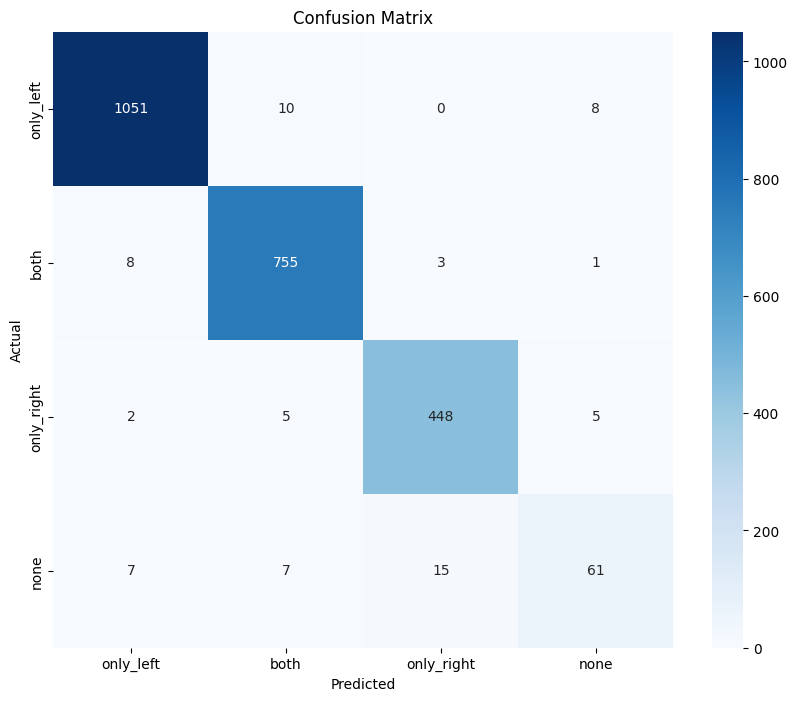

Elapsed time: 16729.89 seconds


In [ ]:
hands_moblienet_model, hands_moblienet_history= train_resnet(hands_moblienet_model,hands_train_dataloader,hands_test_dataloader,hands_num_classes,hands_label_names)

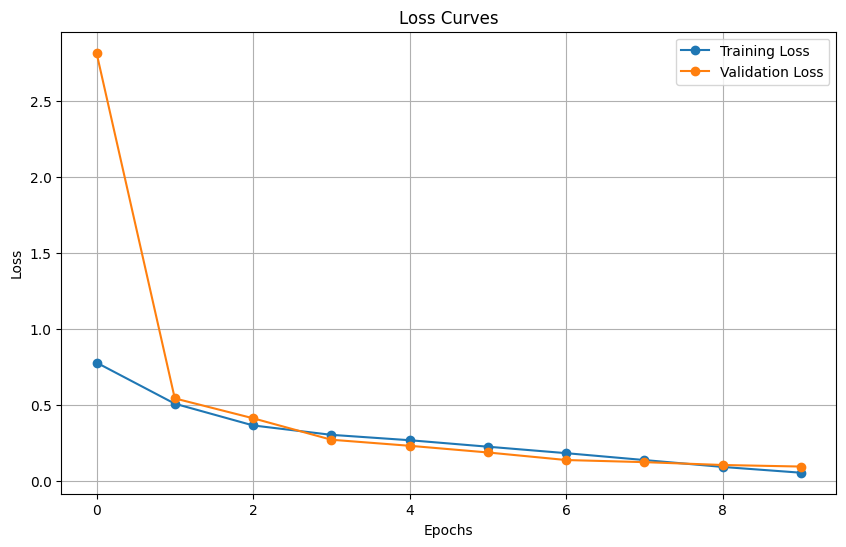

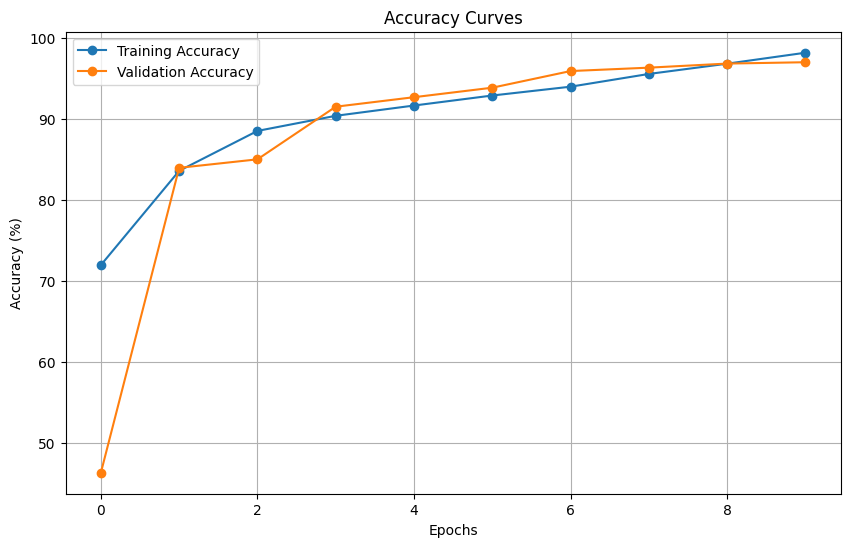

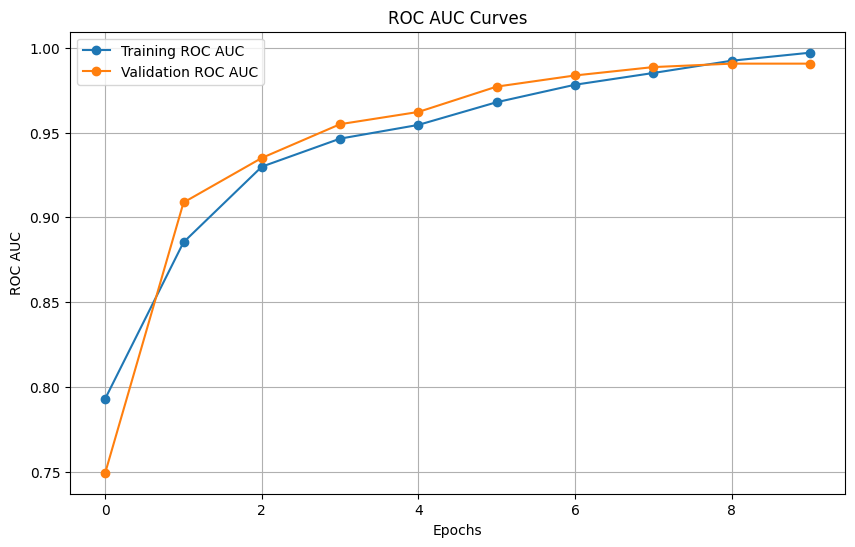

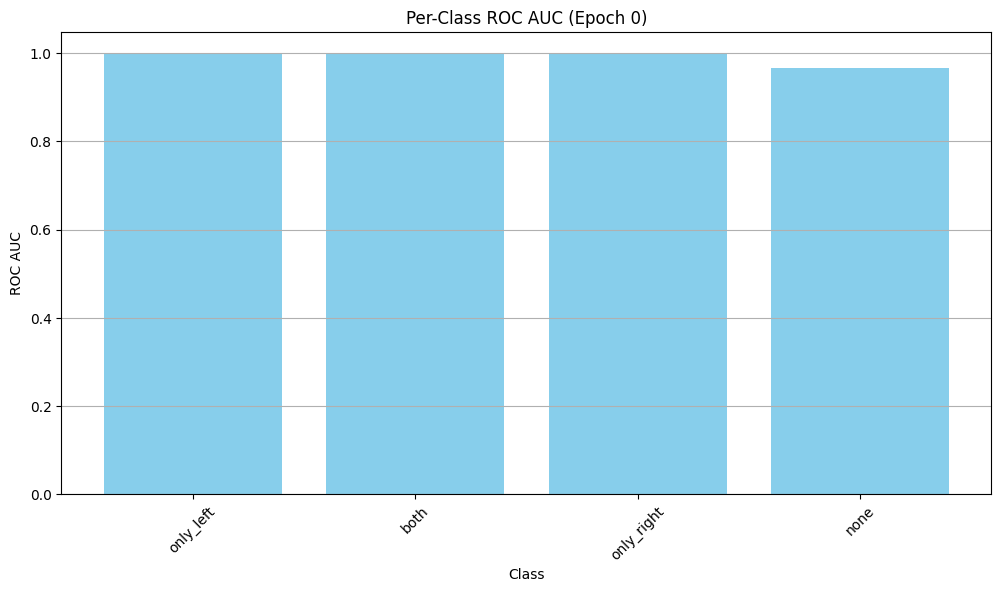

In [ ]:
plot_training_summary(hands_moblienet_history, hands_label_names)

In [ ]:


GAZE_MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/gaze_moblienet_model.pth'
torch.save(gaze_moblienet_model.state_dict(), GAZE_MODEL_SAVE_PATH)

# HANDS_MODEL_SAVE_PATH = '/content/drive/My Drive/DMD/models/hands_moblienet_model.pth'
# torch.save(hands_moblienet_model.state_dict(), HANDS_MODEL_SAVE_PATH)

# Optional: Save the optimizer state_dict
# OPTIMIZER_SAVE_PATH = '/content/drive/My Drive/optimizer.pth'
# torch.save(optimizer.state_dict(), OPTIMIZER_SAVE_PATH)

print(f"Model saved at ")

In [ ]:
import json

In [ ]:
for key, value in actions_moblienet_history.items():
    print(f"Key: {key}, Example Element: {value[0] if len(value) > 0 else 'Empty'}, Type: {type(value[0]) if len(value) > 0 else 'Empty'}")


def make_serializable(data):
    """
    Recursively convert data to JSON-serializable types.
    """
    if isinstance(data, dict):
        return {k: make_serializable(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [make_serializable(v) for v in data]
    elif isinstance(data, (np.ndarray, torch.Tensor)):
        return data.tolist()  # Convert arrays/tensors to lists
    elif isinstance(data, (float, int, str, bool, type(None))):
        return data  # Already serializable
    else:
        return str(data)  # Convert unknown types to strings

serializable_history = make_serializable(actions_moblienet_history)

history_file = "/content/drive/My Drive/DMD/models/actions_moblienet_history.json"

with open(history_file, "w") as f:
    json.dump(serializable_history, f)

print(f"Training history saved to {history_file}")


Key: train_loss, Example Element: 1.3171226997358294, Type: <class 'numpy.float64'>
Key: val_loss, Example Element: 1.2975968993627107, Type: <class 'numpy.float64'>
Key: train_metrics, Example Element: {'accuracy': 56.39360038493925, 'precision': 0.4305316893389094, 'recall': 0.33813189360853385, 'f1': 0.34988850629979734, 'overall_roc_auc': 0.8447356179740841, 'per_class_roc_auc': {0: 0.8570245434472443, 1: 0.8574720318121861, 2: 0.847758865069732, 3: 0.883757991579604, 4: 0.7898281738738516, 5: 0.8941211096295814, 6: 0.900865414005527, 7: 0.8028645160769629, 8: 0.75539836443382, 9: 0.8582651698123317}, 'confusion_matrix': array([[2676,   10,  182,   37,   25,   26,  108,    2,    9,   89],
       [  85,   34,   11,   11,    3,   70,   85,    2,    0,   21],
       [ 391,    4,  608,    4,    4,   12,  193,    0,   12,    7],
       [ 150,    4,   10,  134,    5,    9,   21,    1,    2,   27],
       [ 283,    0,   38,    9,   34,    0,   44,    0,    3,   31],
       [  78,   33,   

In [ ]:
for key, value in gaze_moblienet_history.items():
    print(f"Key: {key}, Example Element: {value[0] if len(value) > 0 else 'Empty'}, Type: {type(value[0]) if len(value) > 0 else 'Empty'}")


def make_serializable(data):
    """
    Recursively convert data to JSON-serializable types.
    """
    if isinstance(data, dict):
        return {k: make_serializable(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [make_serializable(v) for v in data]
    elif isinstance(data, (np.ndarray, torch.Tensor)):
        return data.tolist()  # Convert arrays/tensors to lists
    elif isinstance(data, (float, int, str, bool, type(None))):
        return data  # Already serializable
    else:
        return str(data)  # Convert unknown types to strings

serializable_history = make_serializable(gaze_moblienet_history)

history_file = "/content/drive/My Drive/DMD/models/gaze_moblienet_history.json"

with open(history_file, "w") as f:
    json.dump(serializable_history, f)

print(f"Training history saved to {history_file}")

In [ ]:
for key, value in hands_moblienet_history.items():
    print(f"Key: {key}, Example Element: {value[0] if len(value) > 0 else 'Empty'}, Type: {type(value[0]) if len(value) > 0 else 'Empty'}")


def make_serializable(data):
    """
    Recursively convert data to JSON-serializable types.
    """
    if isinstance(data, dict):
        return {k: make_serializable(v) for k, v in data.items()}
    elif isinstance(data, list):
        return [make_serializable(v) for v in data]
    elif isinstance(data, (np.ndarray, torch.Tensor)):
        return data.tolist()  # Convert arrays/tensors to lists
    elif isinstance(data, (float, int, str, bool, type(None))):
        return data  # Already serializable
    else:
        return str(data)  # Convert unknown types to strings

serializable_history = make_serializable(hands_moblienet_history)

history_file = "/content/drive/My Drive/DMD/models/hands_moblienet_history.json"

with open(history_file, "w") as f:
    json.dump(serializable_history, f)

print(f"Training history saved to {history_file}")

Key: train_loss, Example Element: 0.7806174033707864, Type: <class 'numpy.float64'>
Key: val_loss, Example Element: 2.819878178894719, Type: <class 'numpy.float64'>
Key: train_metrics, Example Element: {'accuracy': 71.9870048207923, 'precision': 0.5248484126922188, 'recall': 0.5305333379639741, 'f1': 0.5260586564873924, 'overall_roc_auc': 0.7930227280721158, 'per_class_roc_auc': {0: 0.8934221351746559, 1: 0.8611014613060607, 2: 0.8632273027386983, 3: 0.5543400130690481}, 'confusion_matrix': array([[3681,  400,  194,    0],
       [ 592, 2169,  307,    0],
       [ 353,  467, 1019,    0],
       [ 195,  107,   58,    0]])}, Type: <class 'dict'>
Key: val_metrics, Example Element: {'accuracy': 46.35373009220453, 'precision': 0.4549712599575149, 'recall': 0.4480345284543952, 'f1': 0.3126149792452565, 'overall_roc_auc': 0.749298857199957, 'per_class_roc_auc': {0: 0.8416107134663425, 1: 0.9100036802217474, 2: 0.7135107679804958, 3: 0.5320702671312427}, 'confusion_matrix': array([[ 25, 293, 7

#**SLOWFAST MODEL**

In [ ]:
from pytorchvideo.models.slowfast import create_slowfast
import torch

def build_slowfast_model(num_classes, device, dtype):
    """
    Builds a SlowFast model for video classification.

    Args:
        num_classes (int): Number of output classes.
        device (torch.device): Device to run the model on (e.g., 'cuda', 'cpu').
        dtype (torch.dtype): Data type (e.g., torch.float32).

    Returns:
        slowfast_model: Initialized SlowFast model.
    """
    # Create SlowFast model with ResNet backbone
    slowfast_model = create_slowfast(
        input_channels=3,         # RGB input
        model_depth=50,           # ResNet-50 backbone
        alpha=8,                  # Temporal stride for fast pathway
        beta_inv=8,               # Slow pathway is 1/8 the frame rate of fast
        num_classes=num_classes   # Number of output classes
    ).to(device=device, dtype=dtype)

    return slowfast_model


In [ ]:
actions_slowfast_model = build_slowfast_model(actions_num_classes, device, dtype)
gaze_slowfast_model = build_slowfast_model(gaze_num_classes, device, dtype)
hands_slowfast_model = build_slowfast_model(hands_num_classes, device, dtype)

In [ ]:
from torchsummary import summary

 Dummy input for each pathway
slow_input = (3, 8, 224, 224)   # Slow Pathway: Fewer frames
fast_input = (3, 32, 224, 224)  # Fast Pathway: More frames

# Summary of each pathway (manually compute for both)
print("Slow Pathway Summary:")
summary(nn.Sequential(*list(actions_slowfast_model.children())), input_size=slow_input, device="cuda" if torch.cuda.is_available() else "cpu")

print("\nFast Pathway Summary:")
summary(nn.Sequential(*list(actions_slowfast_model.children())), input_size=fast_input, device="cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from pytorchvideo.models.slowfast import create_slowfast
import torch
import torch.nn as nn

def summarize_slowfast(model, slow_input_shape, fast_input_shape, device="cuda"):
    """
    Summarize the SlowFast model with both slow and fast pathways.

    Args:
        model: The SlowFast model instance.
        slow_input_shape: Tuple representing the input shape for the slow pathway (C, T, H, W).
        fast_input_shape: Tuple representing the input shape for the fast pathway (C, T, H, W).
        device: The device to perform the summary on ("cuda" or "cpu").
    """
    model.to(device)
    model.eval()

    # Dummy inputs for both pathways
    slow_input = torch.randn((1, *slow_input_shape)).to(device)  # Batch size = 1
    fast_input = torch.randn((1, *fast_input_shape)).to(device)

    # Forward pass to get the output
    with torch.no_grad():
        output = model([slow_input, fast_input])

    # Print model architecture and shapes
    print("\nModel Architecture:")
    print(model)
    print("\nOutput Shape:")
    print(output.shape)

    # Calculate and display the number of trainable parameters
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"\nTotal Parameters: {total_params:,}")
    print(f"Trainable Parameters: {trainable_params:,}")


# Summarize the model
slow_input_shape = (3, 8, 224, 224)   # Channels, Slow Frames, Height, Width
fast_input_shape = (3, 32, 224, 224)  # Channels, Fast Frames, Height, Width
summarize_slowfast(actions_slowfast_model, slow_input_shape, fast_input_shape, device)
